# Machine Learning to Predict College Level English Success

#### Matched high school records of students enrolling in the California Community College System
Dalton, Beer, Kommanapalli

Import the dataset

In [1]:
# Remove dataset if already created
MMAPEnglish = 0
English = 0

In [2]:
import numpy as np
import pandas as pd

#importing the data 
MMAPEnglish = pd.read_csv('EnglishTransferLevel040718_SQL03.csv')
English = MMAPEnglish

In [3]:
MMAPEnglish['IpedsRace'].unique()

array(['B', 'W', 'H', 'A', 'T', 'X', 'P', 'N'], dtype=object)

In [4]:
English.describe()

,StudentID,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,hs_09_grade_level,hs_09_school_code,hs_09_year_term_code,hs_09_course_id,hs_09_course_grade_points,hs_09_course_grade_category,...,cc_primacy_year_term_code,cc_primacy_course_grade_points,cc_primacy_course_grade_category,cc_primacy_course_success_ind,cc_00_year_term_code,cc_00_course_grade_points,cc_00_course_grade_category,cc_00_course_success_ind,IsDsps,IsEops
count,59998.000000,59998.000000,59992.000000,59998.000000,54311.0,5.431100e+04,54311.000000,54311.000000,54311.000000,54311.000000,...,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000,59998.000000
mean,29999.500000,2.793210,2.697248,2.810833,9.0,2.879440e+13,20100.477785,2122.713815,2.643685,1.771704,...,20145.666906,2.227844,-12.079753,0.698973,20145.701657,2.236886,-11.851778,0.701557,0.040285,0.072269
std,17320.075062,0.601248,0.746214,0.600106,0.0,1.240929e+13,19.751992,12.392879,1.107439,9.785037,...,11.904480,1.527977,35.572728,0.458708,11.921412,1.525333,35.347334,0.457579,0.196628,0.258935
min,1.000000,0.000000,0.000000,0.000000,9.0,1.019560e+12,19983.000000,2100.000000,0.000000,-99.000000,...,20117.000000,0.000000,-99.000000,0.000000,20117.000000,0.000000,-99.000000,0.000000,0.000000,0.000000
25%,15000.250000,2.408000,2.217000,2.432000,9.0,1.964730e+13,20091.000000,2113.000000,2.000000,2.000000,...,20137.000000,0.000000,1.000000,0.000000,20137.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,29999.500000,2.839000,2.763000,2.857000,9.0,3.066650e+13,20103.000000,2130.000000,3.000000,3.000000,...,20147.000000,3.000000,3.000000,1.000000,20147.000000,3.000000,3.000000,1.000000,0.000000,0.000000
75%,44998.750000,3.234000,3.250000,3.247000,9.0,3.667880e+13,20113.000000,2130.000000,3.700000,4.000000,...,20157.000000,3.700000,4.000000,1.000000,20157.000000,4.000000,4.000000,1.000000,0.000000,0.000000
max,59998.000000,4.000000,4.000000,4.000000,9.0,5.872740e+13,20155.000000,2171.000000,4.000000,4.000000,...,20173.000000,4.000000,4.000000,1.000000,20174.000000,4.000000,4.000000,1.000000,1.000000,1.000000


Remove Nan's

In [5]:
# Remove NAN's
English.dropna(inplace=True)

In [6]:
# Check Count
English.shape[0]

32092

Quick check of the dataset

In [7]:
# Print summary statistics of data that exist in dataframe
English.describe()

,StudentID,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,hs_09_grade_level,hs_09_school_code,hs_09_year_term_code,hs_09_course_id,hs_09_course_grade_points,hs_09_course_grade_category,...,cc_primacy_year_term_code,cc_primacy_course_grade_points,cc_primacy_course_grade_category,cc_primacy_course_success_ind,cc_00_year_term_code,cc_00_course_grade_points,cc_00_course_grade_category,cc_00_course_success_ind,IsDsps,IsEops
count,32092.000000,32092.000000,32092.000000,32092.00000,32092.0,3.209200e+04,32092.000000,32092.000000,32092.000000,32092.000000,...,32092.000000,32092.00000,32092.000000,32092.000000,32092.000000,32092.000000,32092.000000,32092.000000,32092.000000,32092.000000
mean,29999.963137,2.831540,2.726867,2.85284,9.0,2.907699e+13,20100.074723,2123.328774,2.670008,2.332731,...,20145.796772,2.23513,-11.451701,0.706874,20145.830020,2.242437,-11.267263,0.709055,0.036302,0.074099
std,17300.371483,0.553279,0.689129,0.54896,0.0,1.193025e+13,19.809313,12.033804,1.076529,6.403027,...,11.920512,1.51879,34.927118,0.455203,11.934731,1.516125,34.738104,0.454205,0.187043,0.261937
min,1.000000,0.447000,0.000000,0.48700,9.0,1.611190e+12,19983.000000,2100.000000,0.000000,-99.000000,...,20125.000000,0.00000,-99.000000,0.000000,20125.000000,0.000000,-99.000000,0.000000,0.000000,0.000000
25%,15029.750000,2.463000,2.263000,2.49200,9.0,1.964880e+13,20093.000000,2130.000000,2.000000,2.000000,...,20137.000000,0.00000,1.000000,0.000000,20137.000000,0.700000,1.000000,0.000000,0.000000,0.000000
50%,30005.000000,2.863500,2.786000,2.88600,9.0,3.066620e+13,20103.000000,2130.000000,3.000000,3.000000,...,20147.000000,3.00000,3.000000,1.000000,20147.000000,3.000000,3.000000,1.000000,0.000000,0.000000
75%,45005.500000,3.239000,3.250000,3.25300,9.0,3.667840e+13,20113.000000,2130.000000,3.700000,4.000000,...,20157.000000,3.70000,4.000000,1.000000,20157.000000,3.700000,4.000000,1.000000,0.000000,0.000000
max,59998.000000,4.000000,4.000000,4.00000,9.0,5.772710e+13,20145.000000,2171.000000,4.000000,4.000000,...,20173.000000,4.00000,4.000000,1.000000,20174.000000,4.000000,4.000000,1.000000,1.000000,1.000000


Drop redundant columns

In [8]:
# Note we are dropping the college course ID values, so we are only looking at whether or not the student was successful
# in their college course without considering what that college course was.
ExcludeColumns = ['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
        'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
        'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
        'hs_10_course_level_code', 'hs_10_course_type_code',  'hs_11_grade_level', 'hs_11_course_title', 
        'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
        'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
        'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
        'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
        'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
        'cc_primacy_course_title', 'cc_primacy_course_grade_category', 'cc_00_course_title', 'cc_00_course_grade', 
        'cc_00_course_grade_category', 'cc_00_course_id', 'cc_primacy_course_id', 'cc_00_course_level', 
        'cc_primacy_course_level', 'cc_primacy_course_grade', 'cc_primacy_course_success_ind', 
        'cc_primacy_college_id', 'cc_primacy_year_term_code', 'cc_primacy_course_grade_points' , 'cc_00_college_id', 
        'cc_00_year_term_code', 'cc_00_course_grade_points', 'hs_09_school_code', 'hs_10_school_code', 'hs_11_school_code',
        'hs_12_school_code', 'hs_recency_school_code', 'IpedsRace']
English = English.drop(ExcludeColumns, axis = 1)
# Dropping the Expository and Remedial columns due to domain experts stating they could be outdated or erroneous as it could 
# be they failed or did not participate for a 0.
# Before removing these columns, when included in the model, we were getting accuracy = 69% to 71%
ExcludeColumns2 = ['EXPOSITORY_UP11', 'EXPOSITORY_UP11_C', 'EXPOSITORY_UP11_Cplus', 'EXPOSITORY_UP11_Bminus',
                   'EXPOSITORY_UP11_B', 'EXPOSITORY_ANY', 'EXPOSITORY_ANY_C', 'EXPOSITORY_ANY_Cplus',
                   'EXPOSITORY_ANY_Bminus', 'EXPOSITORY_ANY_B', 'REMEDIAL_UP11', 'REMEDIAL_UP11_C', 'REMEDIAL_UP11_Cplus',
                   'REMEDIAL_UP11_Bminus', 'REMEDIAL_UP11_B', 'REMEDIAL_ANY', 'REMEDIAL_ANY_C', 'REMEDIAL_ANY_Cplus',
                   'REMEDIAL_ANY_Bminus', 'REMEDIAL_ANY_B',  'IsDsps', 'IsEops']
English = English.drop(ExcludeColumns2, axis = 1)
ExcludeColumns3 = ['hs_09_year_term_code', 'hs_10_year_term_code', 'hs_11_year_term_code', 'hs_12_year_term_code',
                   'hs_recency_year_term_code']
#ImprovExcludeColumns = ['improve_avg', 'improve_direction','hs_09_10_improve', 'hs_10_11_improve', 'hs_11_12_improve']
English = English.drop(ExcludeColumns3, axis = 1)
ExcludeColumns4 = ['hs_09_course_id', 'hs_10_course_id', 'hs_11_course_id', 'hs_12_course_id',
                   'hs_recency_course_id']
English = English.drop(ExcludeColumns4, axis = 1)
ExcludeColumns5 = ['hs_09_course_grade_points', 'hs_09_course_success_ind', 'hs_10_course_grade_points',
                   'hs_10_course_success_ind', 'hs_recency_grade_level', 'hs_11_course_success_ind', 
                   'hs_12_course_success_ind', 'hs_recency_course_success_ind', 'hs_11_course_grade_points',
                   'hs_12_course_grade_points', 'hs_recency_course_grade_points']
English = English.drop(ExcludeColumns5, axis = 1)

In [9]:
# To include Gender, uncomment the below recoding and comment out the ExcludeColumns, Recode Gender column to M = 1, F = 0
#English['Gender'] = np.where(English['Gender'] == 'M', 1, 0)
ExcludeColumns6 = ['Gender']
English = English.drop(ExcludeColumns6, axis = 1)

In [10]:
# Check Count
English.shape[0]

32092

In [11]:
English.describe()

,StudentID,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind
count,32092.000000,32092.000000,32092.000000,32092.00000,32092.000000
mean,29999.963137,2.831540,2.726867,2.85284,0.709055
std,17300.371483,0.553279,0.689129,0.54896,0.454205
min,1.000000,0.447000,0.000000,0.48700,0.000000
25%,15029.750000,2.463000,2.263000,2.49200,0.000000
50%,30005.000000,2.863500,2.786000,2.88600,1.000000
75%,45005.500000,3.239000,3.250000,3.25300,1.000000
max,59998.000000,4.000000,4.000000,4.00000,1.000000


In [12]:
#Drop Cohort Year,StudentId
ExcludeColumns = ['CohortYear','StudentID']
English = English.drop(ExcludeColumns, axis = 1)

Check column types

In [13]:
English.dtypes

OverallCumulativeGradePointAverage                  float64
SubjectCumulativeGradePointAverage                  float64
WithoutSubjectOverallCumulativeGradePointAverage    float64
cc_00_course_success_ind                              int64
dtype: object

Check how many of each response we have

In [14]:
English.shape

(32092, 4)

In [15]:
English.shape[0]

32092

In [16]:
English['cc_00_course_success_ind'].value_counts()

1    22755
0     9337
Name: cc_00_course_success_ind, dtype: int64

Graphic Visualization of Important Variables

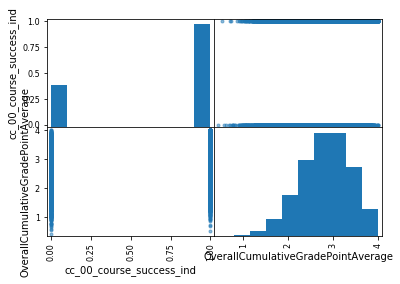

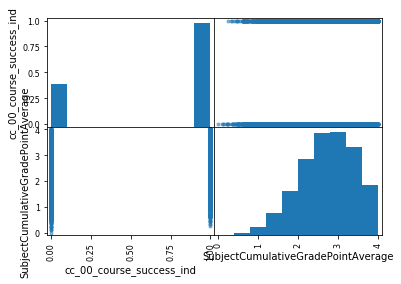

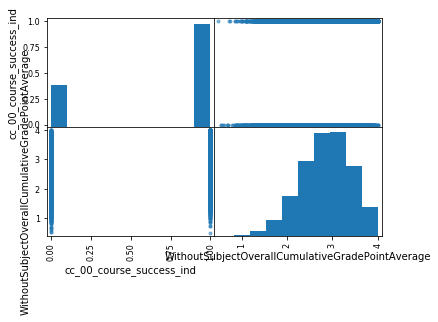

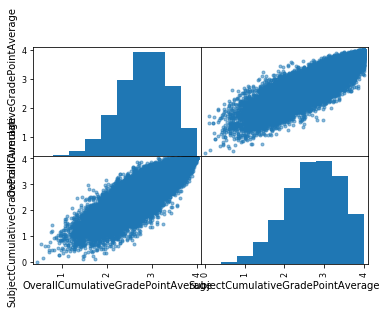

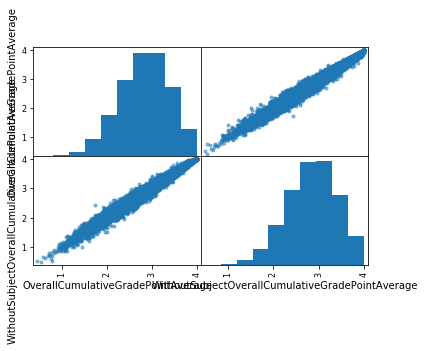

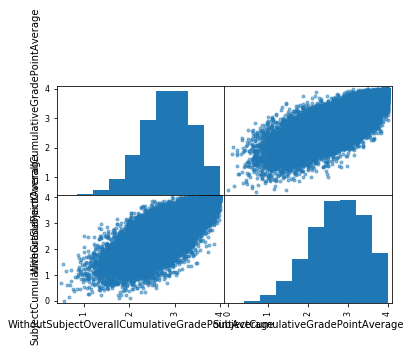

In [17]:
import matplotlib
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
matplotlib.interactive(True)

scatter_matrix(English[['cc_00_course_success_ind', 'OverallCumulativeGradePointAverage']]) 
scatter_matrix(English[['cc_00_course_success_ind', 'SubjectCumulativeGradePointAverage']]) 
scatter_matrix(English[['cc_00_course_success_ind', 'WithoutSubjectOverallCumulativeGradePointAverage']]) 
scatter_matrix(English[['OverallCumulativeGradePointAverage', 'SubjectCumulativeGradePointAverage']]) 
scatter_matrix(English[['OverallCumulativeGradePointAverage', 'WithoutSubjectOverallCumulativeGradePointAverage']])
scatter_matrix(English[['WithoutSubjectOverallCumulativeGradePointAverage', 'SubjectCumulativeGradePointAverage']]) 

plt.show()

### This is where Harsha's code starts

In [18]:
from scipy.stats import gaussian_kde
import numpy as np

def samplestrat(df, stratifying_column_name, num_to_sample, maxrows_to_est = 10000, bw_per_range = 50.0, eval_points = 1000 ):
    '''Take a sample of dataframe df stratified by stratifying_column_name
    '''
    strat_col_values = df[stratifying_column_name].values
    samplcol = (df.sample(maxrows_to_est)  if df.shape[0] > maxrows_to_est else df  )[stratifying_column_name].values
    vmin, vmax = min(samplcol), max(samplcol)
    pts = np.linspace(vmin,vmax  ,eval_points) 
    kernel = gaussian_kde( samplcol , bw_method = float(  (vmax - vmin)/bw_per_range  )   )
    density_estim_full = np.interp(strat_col_values, pts , kernel.evaluate(pts) )
    return df.sample(n=num_to_sample, weights = 1/(density_estim_full))

In [19]:
Z0_stratified_sample = samplestrat(English, 'cc_00_course_success_ind',18000)
#Z0_stratified_sample = English

In [20]:
Z0_stratified_sample['cc_00_course_success_ind'].value_counts()

1    10708
0     7292
Name: cc_00_course_success_ind, dtype: int64

In [21]:
#Z0_stratified_sample = pd.get_dummies(Z0_stratified_sample, columns=["IpedsRace","IsDsps","IsEops"])

In [22]:
#import seaborn as sns; 
#sns.set()
#ax = sns.heatmap(Z0_stratified_sample)

In [23]:
#from sklearn.utils import resample
## Separate majority and minority classes
#df_majority = Z0_stratified_sample[Z0_stratified_sample.cc_00_course_success_ind==1]
#df_minority = Z0_stratified_sample[Z0_stratified_sample.cc_00_course_success_ind==0]
 
## Downsample majority class
#df_majority_downsampled = resample(df_majority, 
 #                                replace=False,    # sample without replacement
#                                 n_samples=11000,     # to match minority class
#                                 random_state=123) # reproducible results
 
## Combine minority class with downsampled majority class
#df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
#df_downsampled.cc_00_course_success_ind.value_counts()


#df_downsampled
#Z0_stratified_sample = df_downsampled

#Keeping handy: forced equal classes for df....

In [24]:
Z0_stratified_sample['cc_00_course_success_ind'].value_counts()

1    10708
0     7292
Name: cc_00_course_success_ind, dtype: int64

In [25]:
# seperate our target variable from our main data set to use with sci-kit learn
# delete target variable from df containing main data set
df_target = Z0_stratified_sample[['cc_00_course_success_ind']]
del Z0_stratified_sample['cc_00_course_success_ind']
df_target.head()

,cc_00_course_success_ind
3722,1
24921,1
25874,0
8959,0
32131,1


In [26]:
df_target.shape[0]

18000

In [27]:
# set the variables to X and y for easier reading
X = Z0_stratified_sample
y = df_target

In [28]:
X.shape[0]

18000

In [29]:
X.describe()

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage
count,18000.000000,18000.000000,18000.000000
mean,2.791513,2.675442,2.815451
std,0.556786,0.697444,0.552005
min,0.447000,0.000000,0.487000
25%,2.418000,2.213000,2.446000
50%,2.820000,2.725000,2.843000
75%,3.202000,3.200000,3.218000
max,4.000000,4.000000,4.000000


In [30]:
y['cc_00_course_success_ind'].value_counts()

1    10708
0     7292
Name: cc_00_course_success_ind, dtype: int64

In [31]:
from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 12345)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=12345, test_size=0.2, train_size=None)


### Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics as mt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

nb_clf_m = GaussianNB()
iter_num=0
# the indices are the rows used for training and testing in each iteration
accuracy_runs = []

for train_indices, test_indices in cv_object.split(X,y): 
    
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
   
    y_train = y_m[train_indices]
    
    y_train = np.ravel(y_train)
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    #sm = SMOTE(random_state=12, ratio = 1.0)
    #sm.fit_sample(X_train, y_train)
    
    nb_clf_m.fit(X_train, y_train)
    y_hat_m = nb_clf_m.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat_m)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(y_test,y_hat_m)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    precision, recall, fscore, support = score(y_test, y_hat_m)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    iter_num+=1

print ('average accuracy: ', np.array(accuracy_runs).mean())

====Iteration 0  ====
accuracy 0.6644444444444444
confusion matrix
 [[ 788  633]
 [ 575 1604]]
precision: [0.57813646 0.71703174]
recall: [0.55453906 0.73611749]
fscore: [0.56609195 0.72644928]
support: [1421 2179]
====Iteration 1  ====
accuracy 0.65
confusion matrix
 [[ 797  677]
 [ 583 1543]]
precision: [0.57753623 0.69504505]
recall: [0.54070556 0.72577611]
fscore: [0.55851437 0.71007823]
support: [1474 2126]
====Iteration 2  ====
accuracy 0.6625
confusion matrix
 [[ 834  642]
 [ 573 1551]]
precision: [0.59275053 0.70725034]
recall: [0.56504065 0.73022599]
fscore: [0.578564   0.71855455]
support: [1476 2124]
====Iteration 3  ====
accuracy 0.6711111111111111
confusion matrix
 [[ 791  656]
 [ 528 1625]]
precision: [0.59969674 0.71240684]
recall: [0.54664824 0.7547608 ]
fscore: [0.57194505 0.73297249]
support: [1447 2153]
====Iteration 4  ====
accuracy 0.6683333333333333
confusion matrix
 [[ 831  623]
 [ 571 1575]]
precision: [0.59272468 0.71656051]
recall: [0.57152682 0.73392358]
fsco

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
import numpy as np
lr_clf_m = LogisticRegression(penalty='l2', C=1.0, class_weight=None,random_state=1234)
iter_num=0
# the indices are the rows used for training and testing in each iteration
accuracy_runs = []

for train_indices, test_indices in cv_object.split(X,y):  
    
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
   
    y_train = y_m[train_indices]
    
    y_train = np.ravel(y_train)
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    #sm = SMOTE(random_state=12, ratio = 1.0)
    #sm.fit_sample(X_train, y_train)
    
    lr_clf_m.fit(X_train, y_train)
    y_hat_m = lr_clf_m.predict(X_test)
    
    acc = mt.accuracy_score(y_test,y_hat_m)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(y_test,y_hat_m)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    precision, recall, fscore, support = score(y_test, y_hat_m)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    iter_num+=1

print ('average accuracy: ', np.array(accuracy_runs).mean())

====Iteration 0  ====
accuracy 0.6761111111111111
confusion matrix
 [[ 636  785]
 [ 381 1798]]
precision: [0.62536873 0.69608982]
recall: [0.44757213 0.82514915]
fscore: [0.52173913 0.7551449 ]
support: [1421 2179]
====Iteration 1  ====
accuracy 0.6525
confusion matrix
 [[ 638  836]
 [ 415 1711]]
precision: [0.60588794 0.67177071]
recall: [0.43283582 0.80479774]
fscore: [0.50494658 0.73229189]
support: [1474 2126]
====Iteration 2  ====
accuracy 0.6688888888888889
confusion matrix
 [[ 667  809]
 [ 383 1741]]
precision: [0.6352381 0.6827451]
recall: [0.45189702 0.81967985]
fscore: [0.52810768 0.74497219]
support: [1476 2124]
====Iteration 3  ====
accuracy 0.6652777777777777
confusion matrix
 [[ 609  838]
 [ 367 1786]]
precision: [0.62397541 0.68064024]
recall: [0.42087077 0.82954018]
fscore: [0.50268262 0.74774963]
support: [1447 2153]
====Iteration 4  ====
accuracy 0.6727777777777778
confusion matrix
 [[ 662  792]
 [ 386 1760]]
precision: [0.63167939 0.68965517]
recall: [0.45529574 0.82

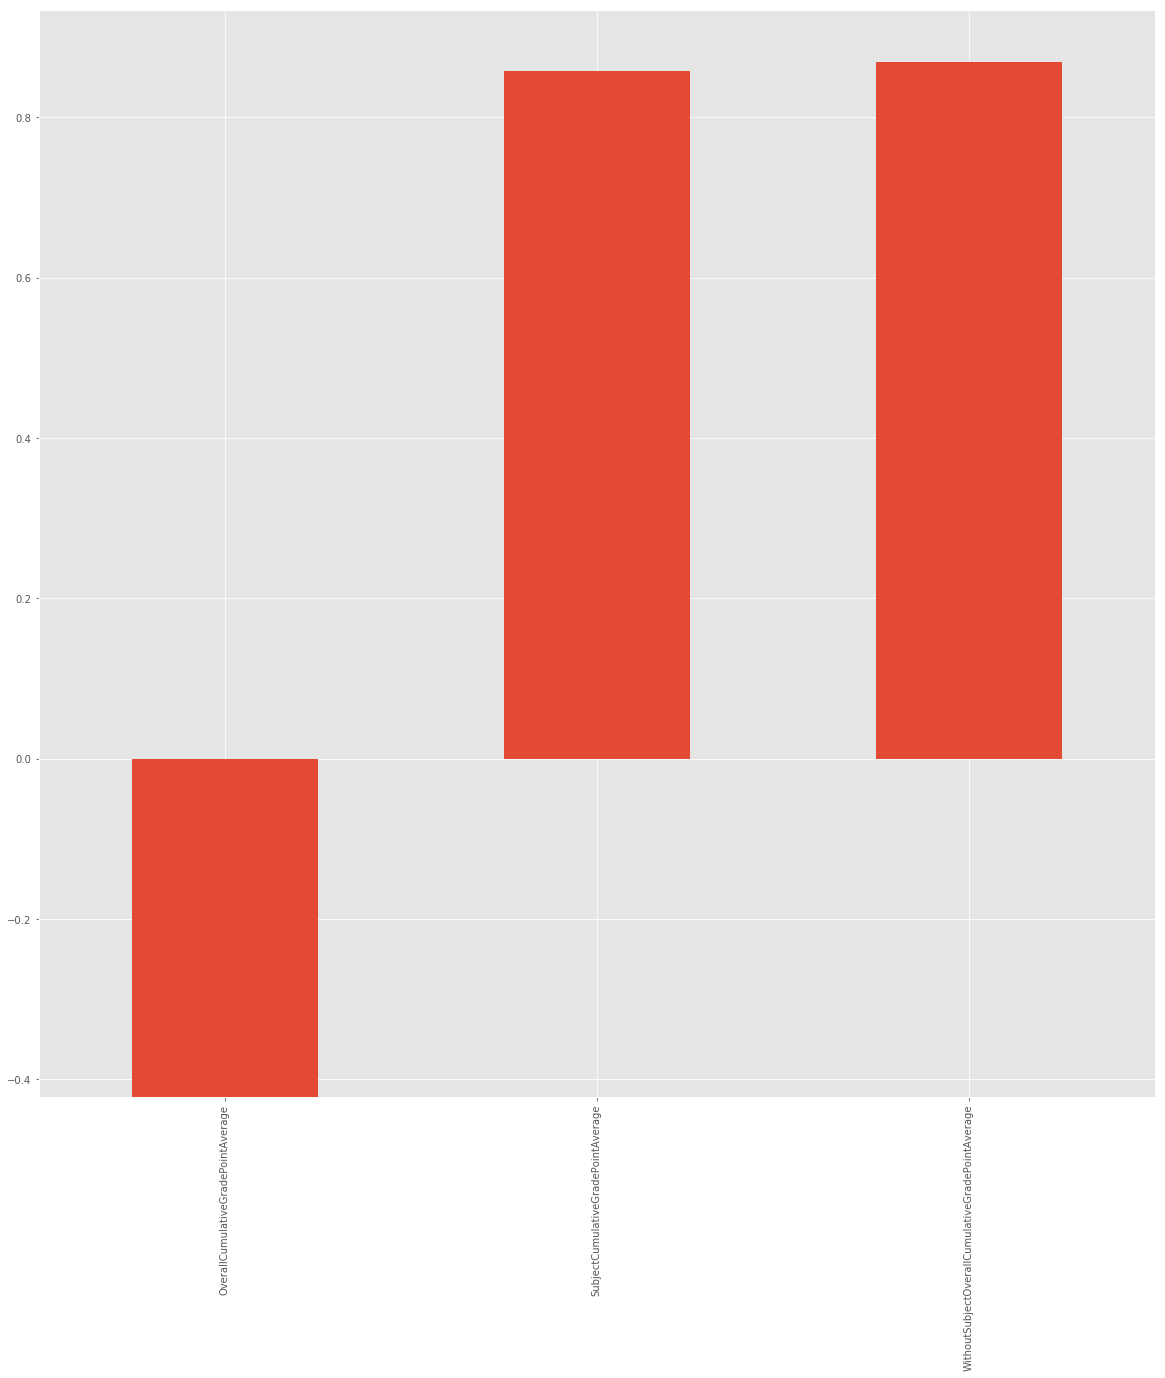

In [34]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lr_clf_m.coef_[0],index=Z0_stratified_sample.columns)
weights.plot(kind='bar',figsize=(20,20))
plt.show()

In [35]:
#ANN

In [36]:
# Create X and y sets for ANN
English_X = X
English_y = y
#del English_X['cc_00_course_success_ind']

In [37]:
len_X=int(X.shape[1])

# We are using stratify so sklearn will ensure our test and train sets have the same proportion of responses 0 / 1.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(English_X, English_y, test_size=0.2, random_state=123, stratify=y)

############################ Apply StandardScalar transformation##############
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
#ANN Starts here#############################################################################################

# The issue now is that we need to optimize the weights, just takes testing.

from keras.models import Sequential
from keras.layers import Dense, Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
# This one produced acc = 98.94%
classifier.add(Dense(units = 100, kernel_initializer = 'random_uniform', bias_initializer = 'zeros', activation = 'tanh',
                     input_dim = len_X))
#Add hidden layers
classifier.add(Dense(100, activation='relu'))
classifier.add(Dense(50, kernel_initializer='uniform', activation='sigmoid'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'random_uniform', activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy', 'mae'])
########################### Implement EarlyStopping ##########################################
#from keras.callbacks import EarlyStopping
#early_stopping = EarlyStopping(monitor='val_loss', patience=5)
# Fit classifier
classifier.fit(np.array(X_train), np.array(y_train), batch_size = 2000, epochs = 100, validation_split=0.2)
######################################### Predict on X_test ####################
y_pred = classifier.predict(X_test)
######################################### Calculate the score ####################
score = classifier.evaluate(np.array(X_test), np.array(y_test), batch_size=50)

Using TensorFlow backend.


Train on 11520 samples, validate on 2880 samples
Epoch 1/100
11520/11520 [==============================] - 1s 77us/step - loss: 0.6970 - acc: 0.4744 - mean_absolute_error: 0.5017 - val_loss: 0.6873 - val_acc: 0.5927 - val_mean_absolute_error: 0.4969
Epoch 2/100
11520/11520 [==============================] - 0s 5us/step - loss: 0.6820 - acc: 0.5954 - mean_absolute_error: 0.4935 - val_loss: 0.6759 - val_acc: 0.5927 - val_mean_absolute_error: 0.4888
Epoch 3/100
11520/11520 [==============================] - 0s 5us/step - loss: 0.6719 - acc: 0.5954 - mean_absolute_error: 0.4851 - val_loss: 0.6676 - val_acc: 0.5927 - val_mean_absolute_error: 0.4803
Epoch 4/100
11520/11520 [==============================] - 0s 5us/step - loss: 0.6629 - acc: 0.5954 - mean_absolute_error: 0.4761 - val_loss: 0.6585 - val_acc: 0.5927 - val_mean_absolute_error: 0.4714

In [39]:
# Print out results of ANN
print("%s of Testing: %.2f%%" % (classifier.metrics_names[1], score[1] ))
print("%s of Training: %.2f%%" % (classifier.metrics_names[1], score[0]))
print("%s: %.2f%%" % (classifier.metrics_names[2], score[2] ))
print("Score", score)

acc of Testing: 0.66%
acc of Training: 0.61%
mean_absolute_error: 0.42%
Score [0.6116882268753316, 0.6588888963063558, 0.4230104254351722]


precision: [0.59535655 0.6908939 ]
recall: [0.49245542 0.77217554]
fscore: [0.53903904 0.7292769 ]
support: [1458 2142]
[[  65 1393]
 [  16 2126]]
precision [0.59599332 0.59588088 0.59604677 ... 1.         1.         1.        ]
recall [1.00000000e+00 9.99533147e-01 9.99533147e-01 ... 9.33706816e-04
 4.66853408e-04 0.00000000e+00]
thresholds [0.27346435 0.27518418 0.27590194 ... 0.8869144  0.8871132  0.8872053 ]
Average precision-recall score: 0.77


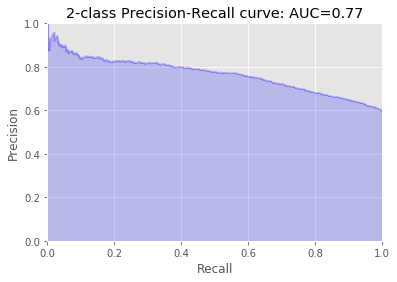

In [40]:
#################################################################################
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y_test, y_pred>0.5)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))


######################################### Confusion Matrix ####################

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred>.3)
#print("summary",classifier.metrics_names)
print (cm.view())

######################### Precision Recall Curve################
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, thresholds = precision_recall_curve(y_test,y_pred)
print('precision', precision)
print('recall', recall)
print('thresholds',thresholds)
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
          average_precision))
################################################


### SVM

In [41]:
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()

/Users/Harsha/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy 0.6758333333333333
confusion matrix
[[ 633  788]
 [ 379 1800]]


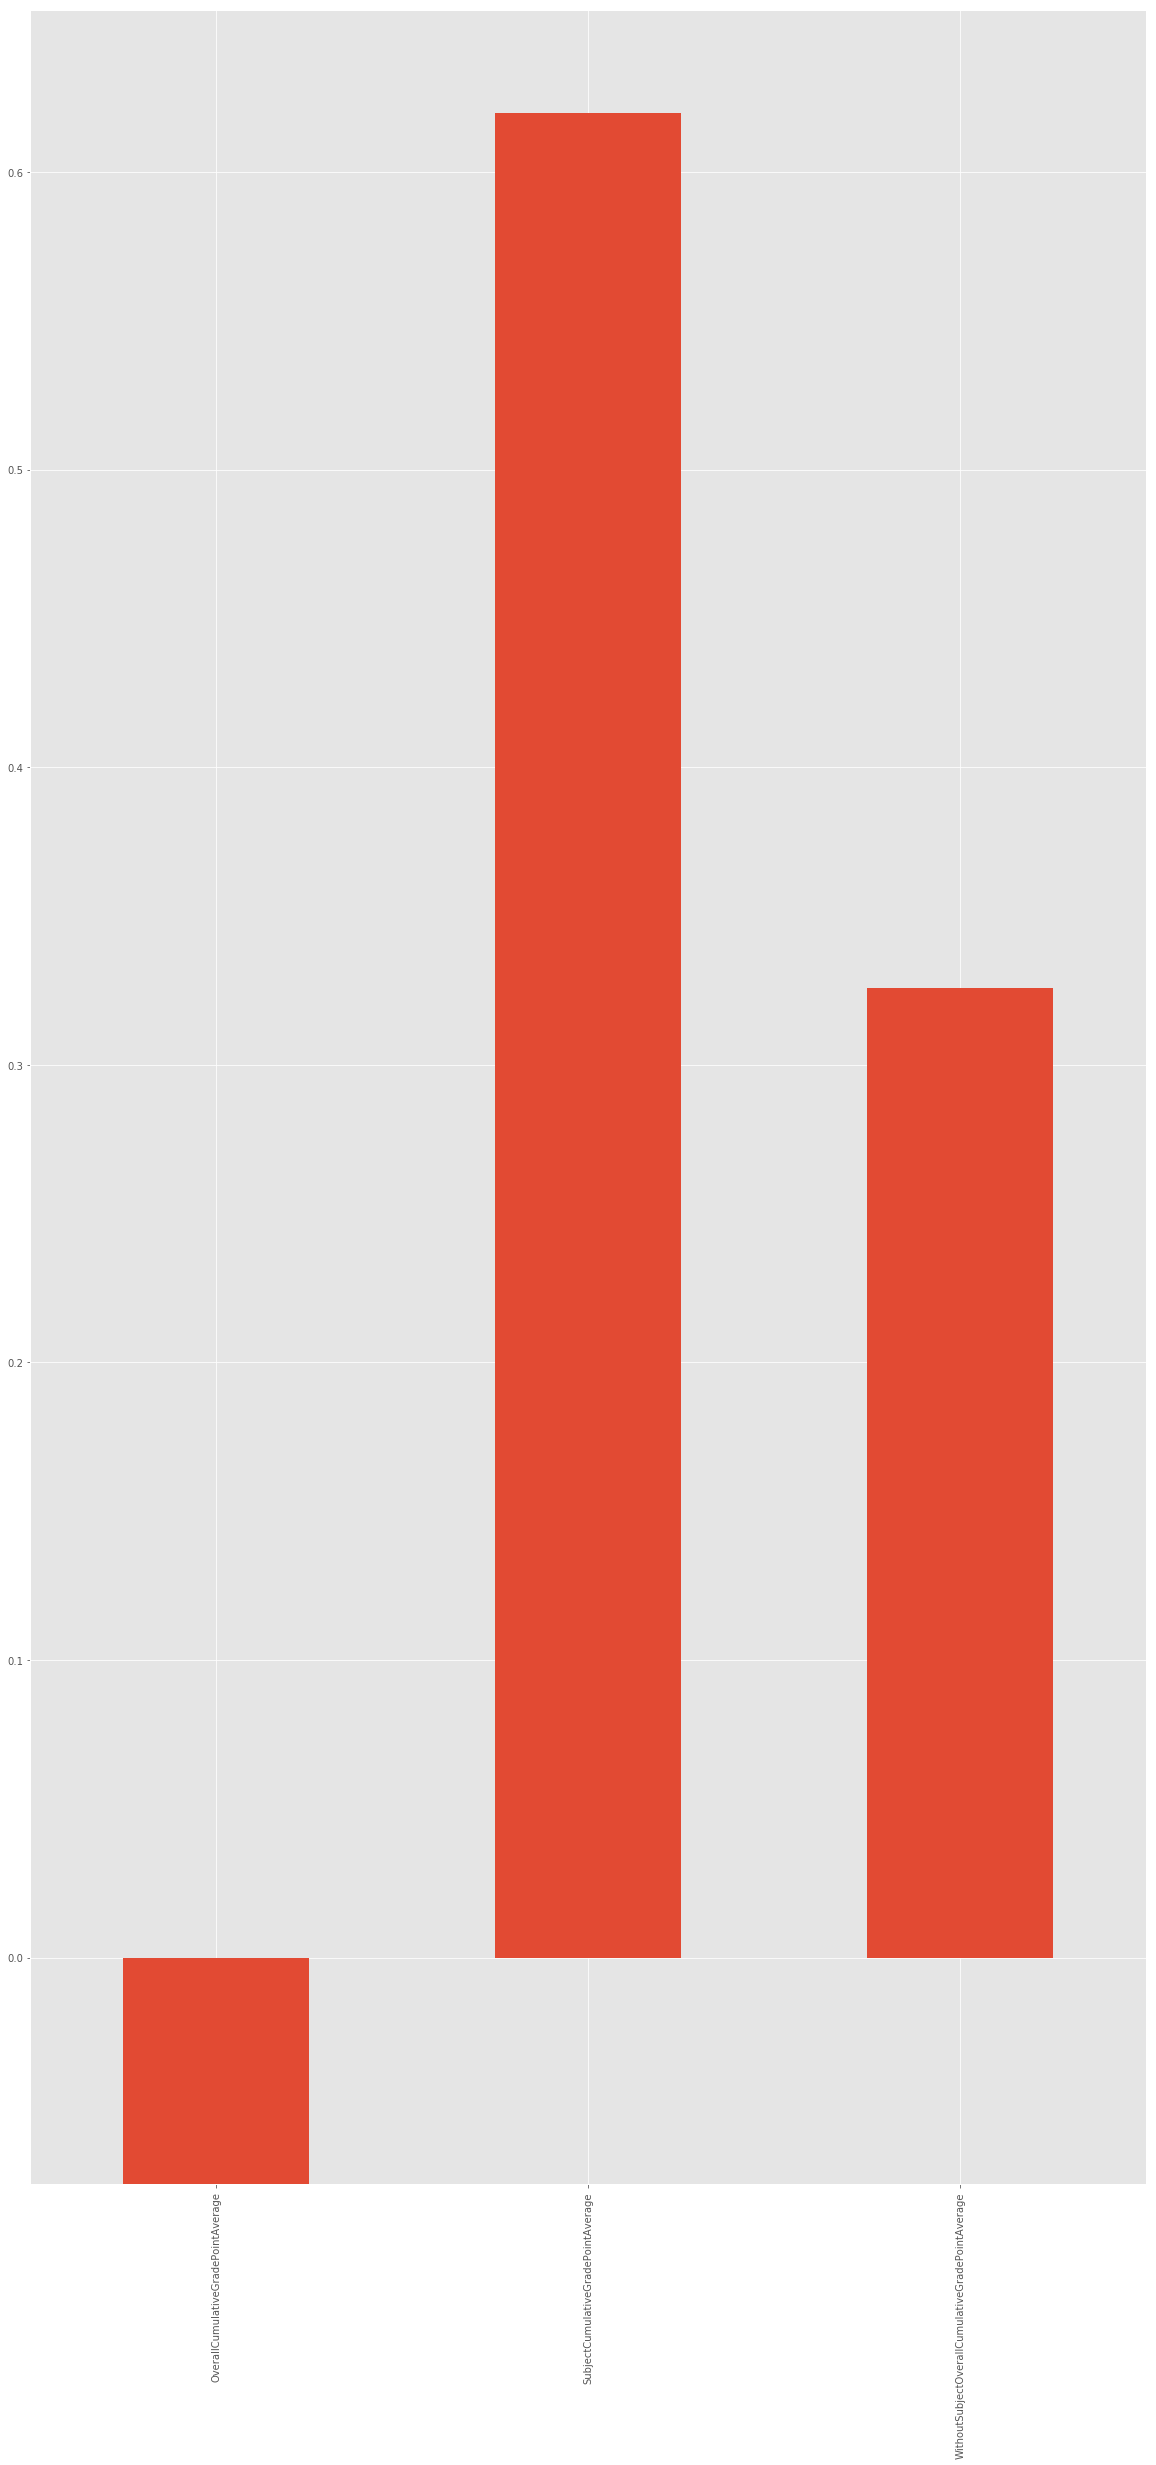

accuracy 0.6513888888888889
confusion matrix
[[ 627  847]
 [ 408 1718]]


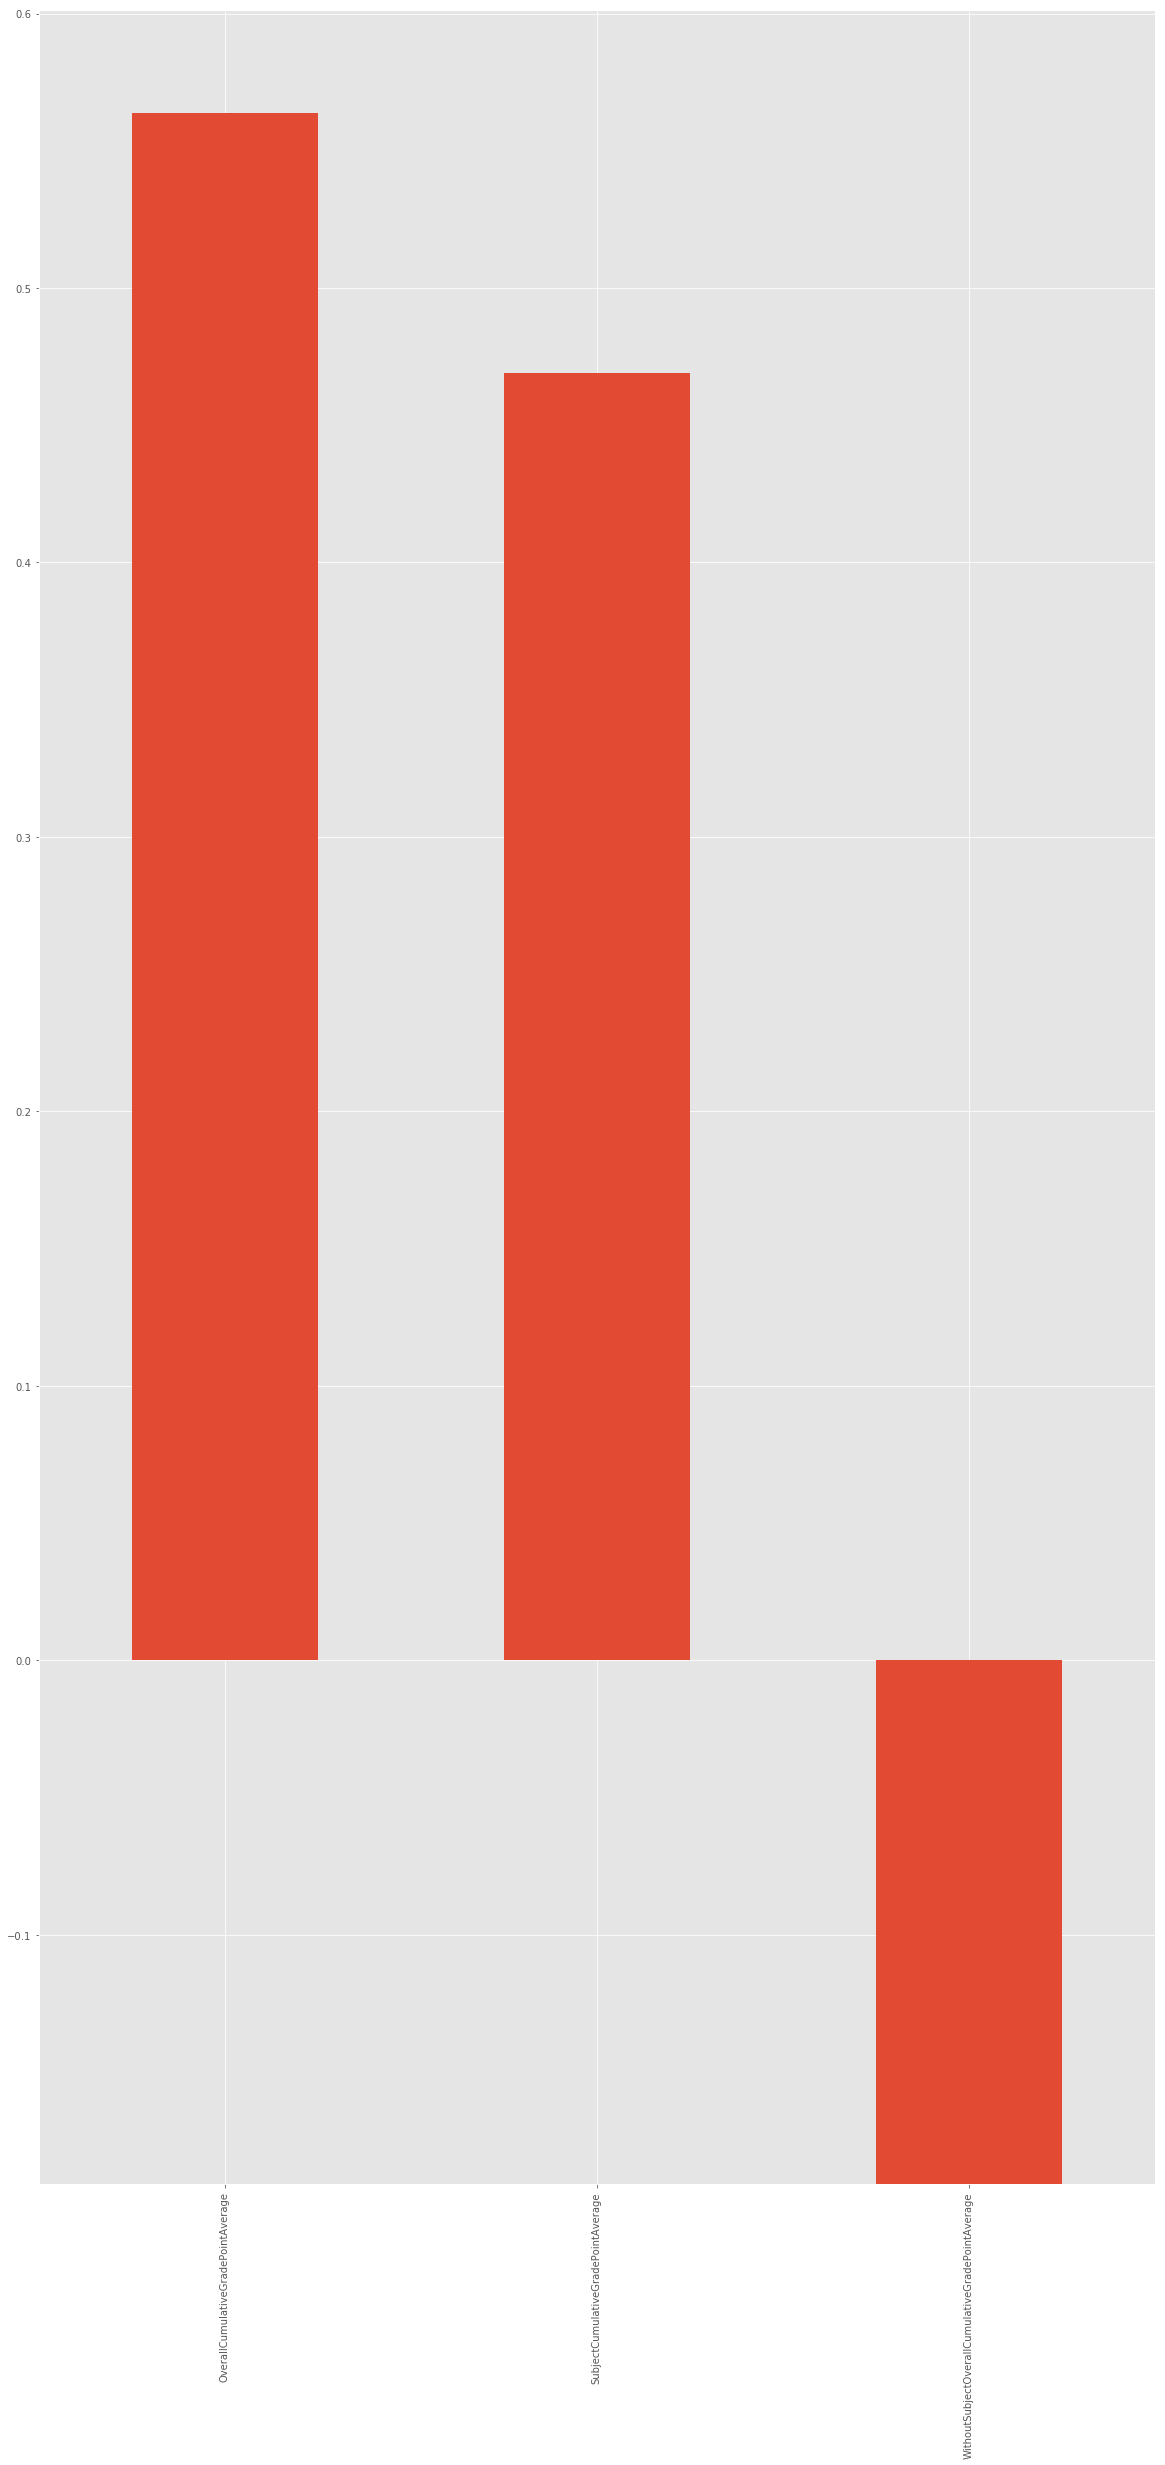

accuracy 0.6705555555555556
confusion matrix
[[ 661  815]
 [ 371 1753]]


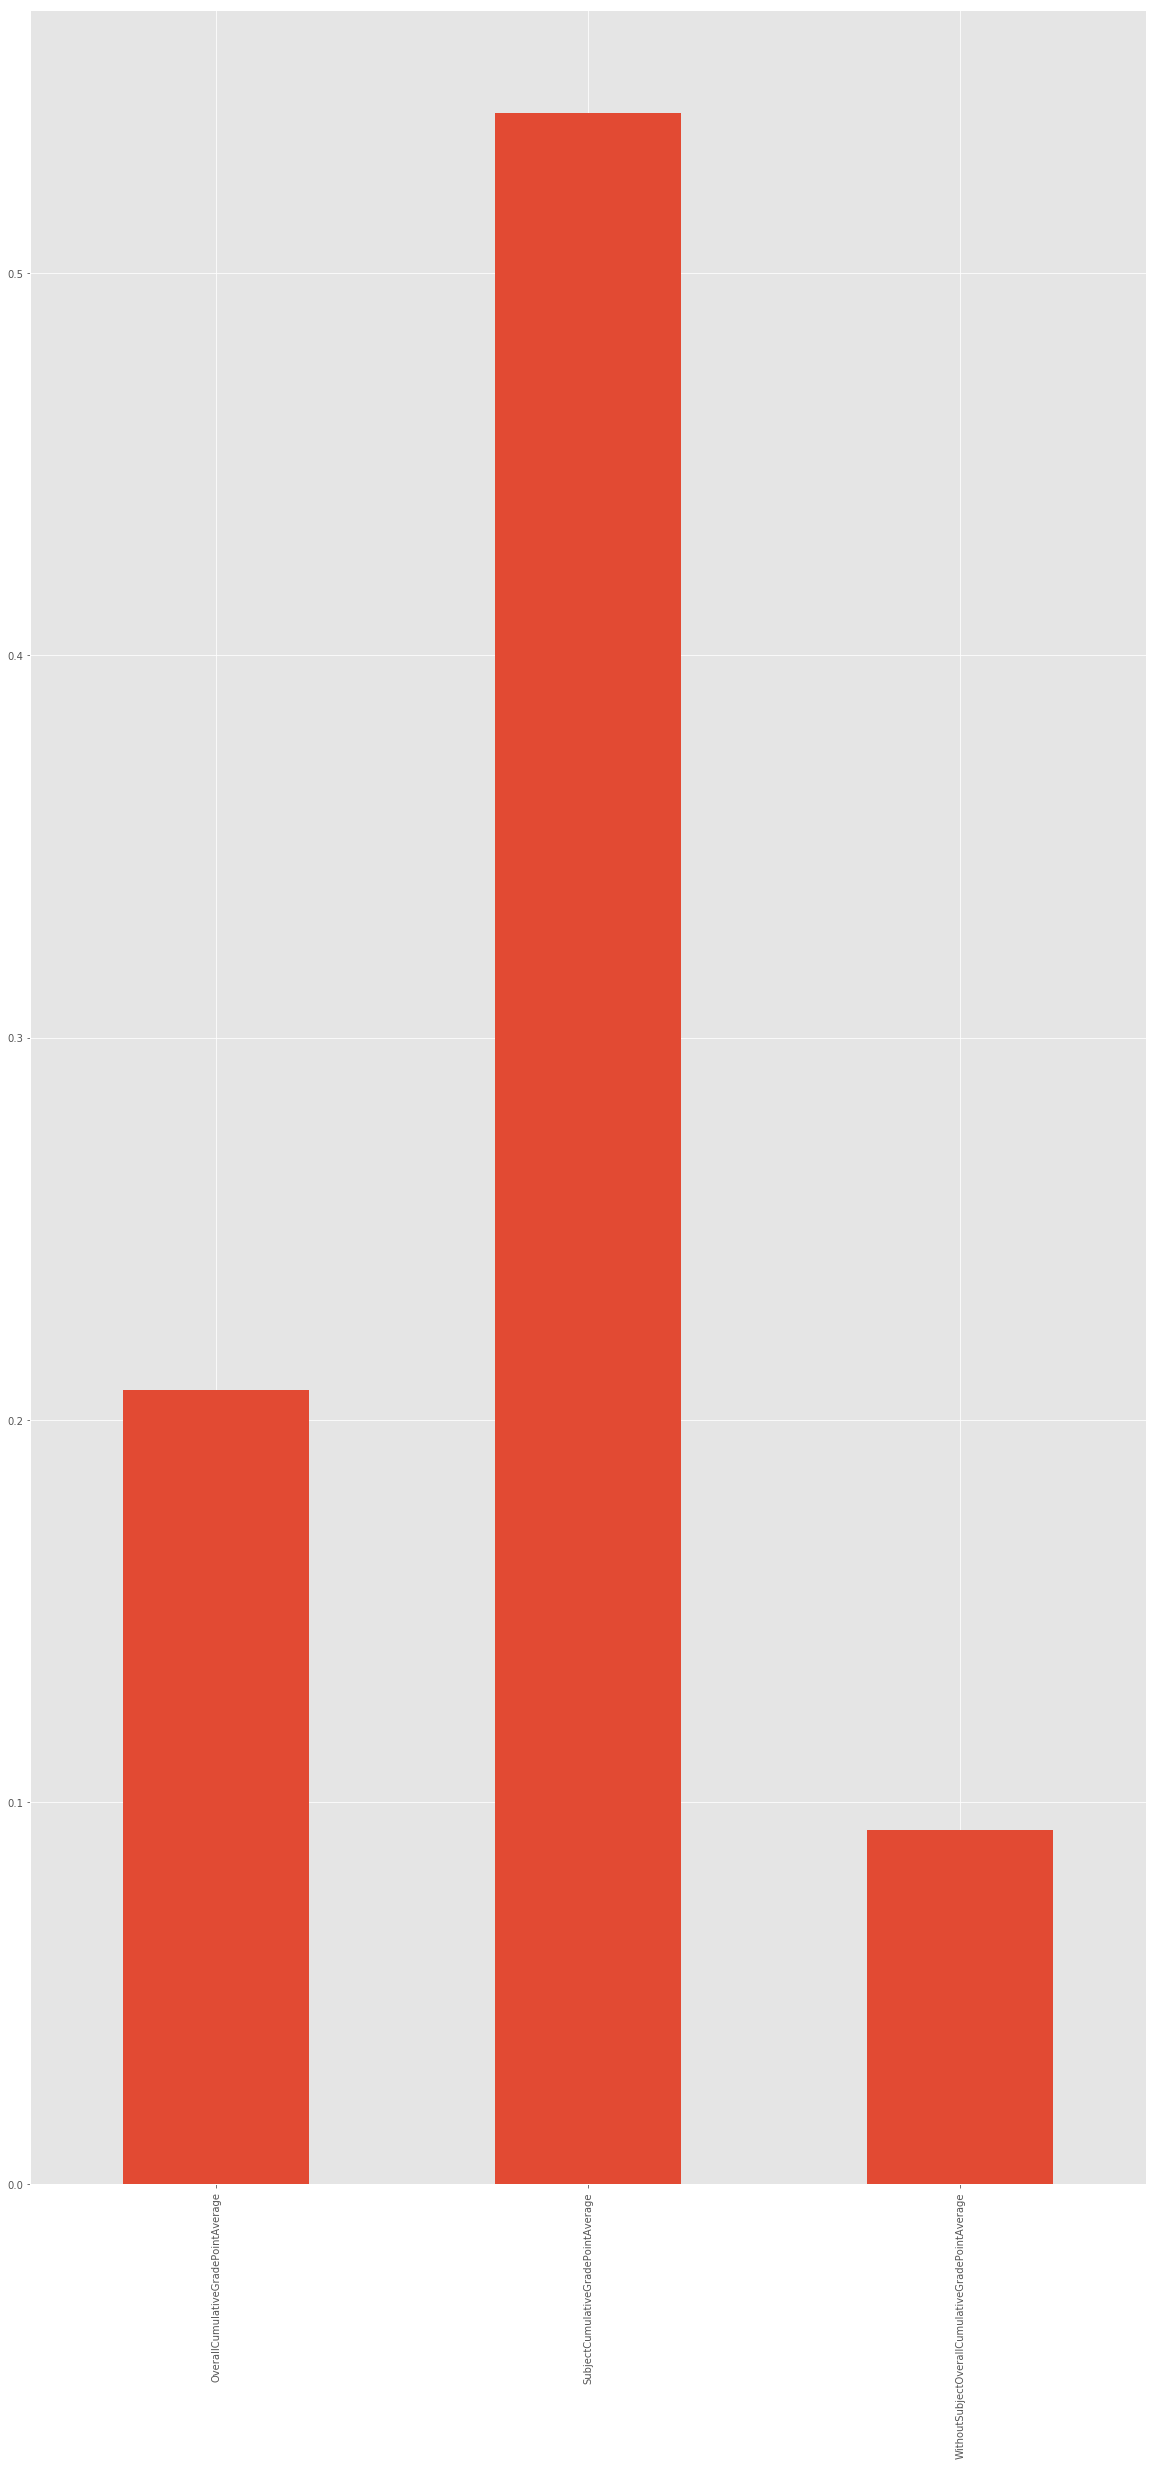

accuracy 0.6644444444444444
confusion matrix
[[ 606  841]
 [ 367 1786]]


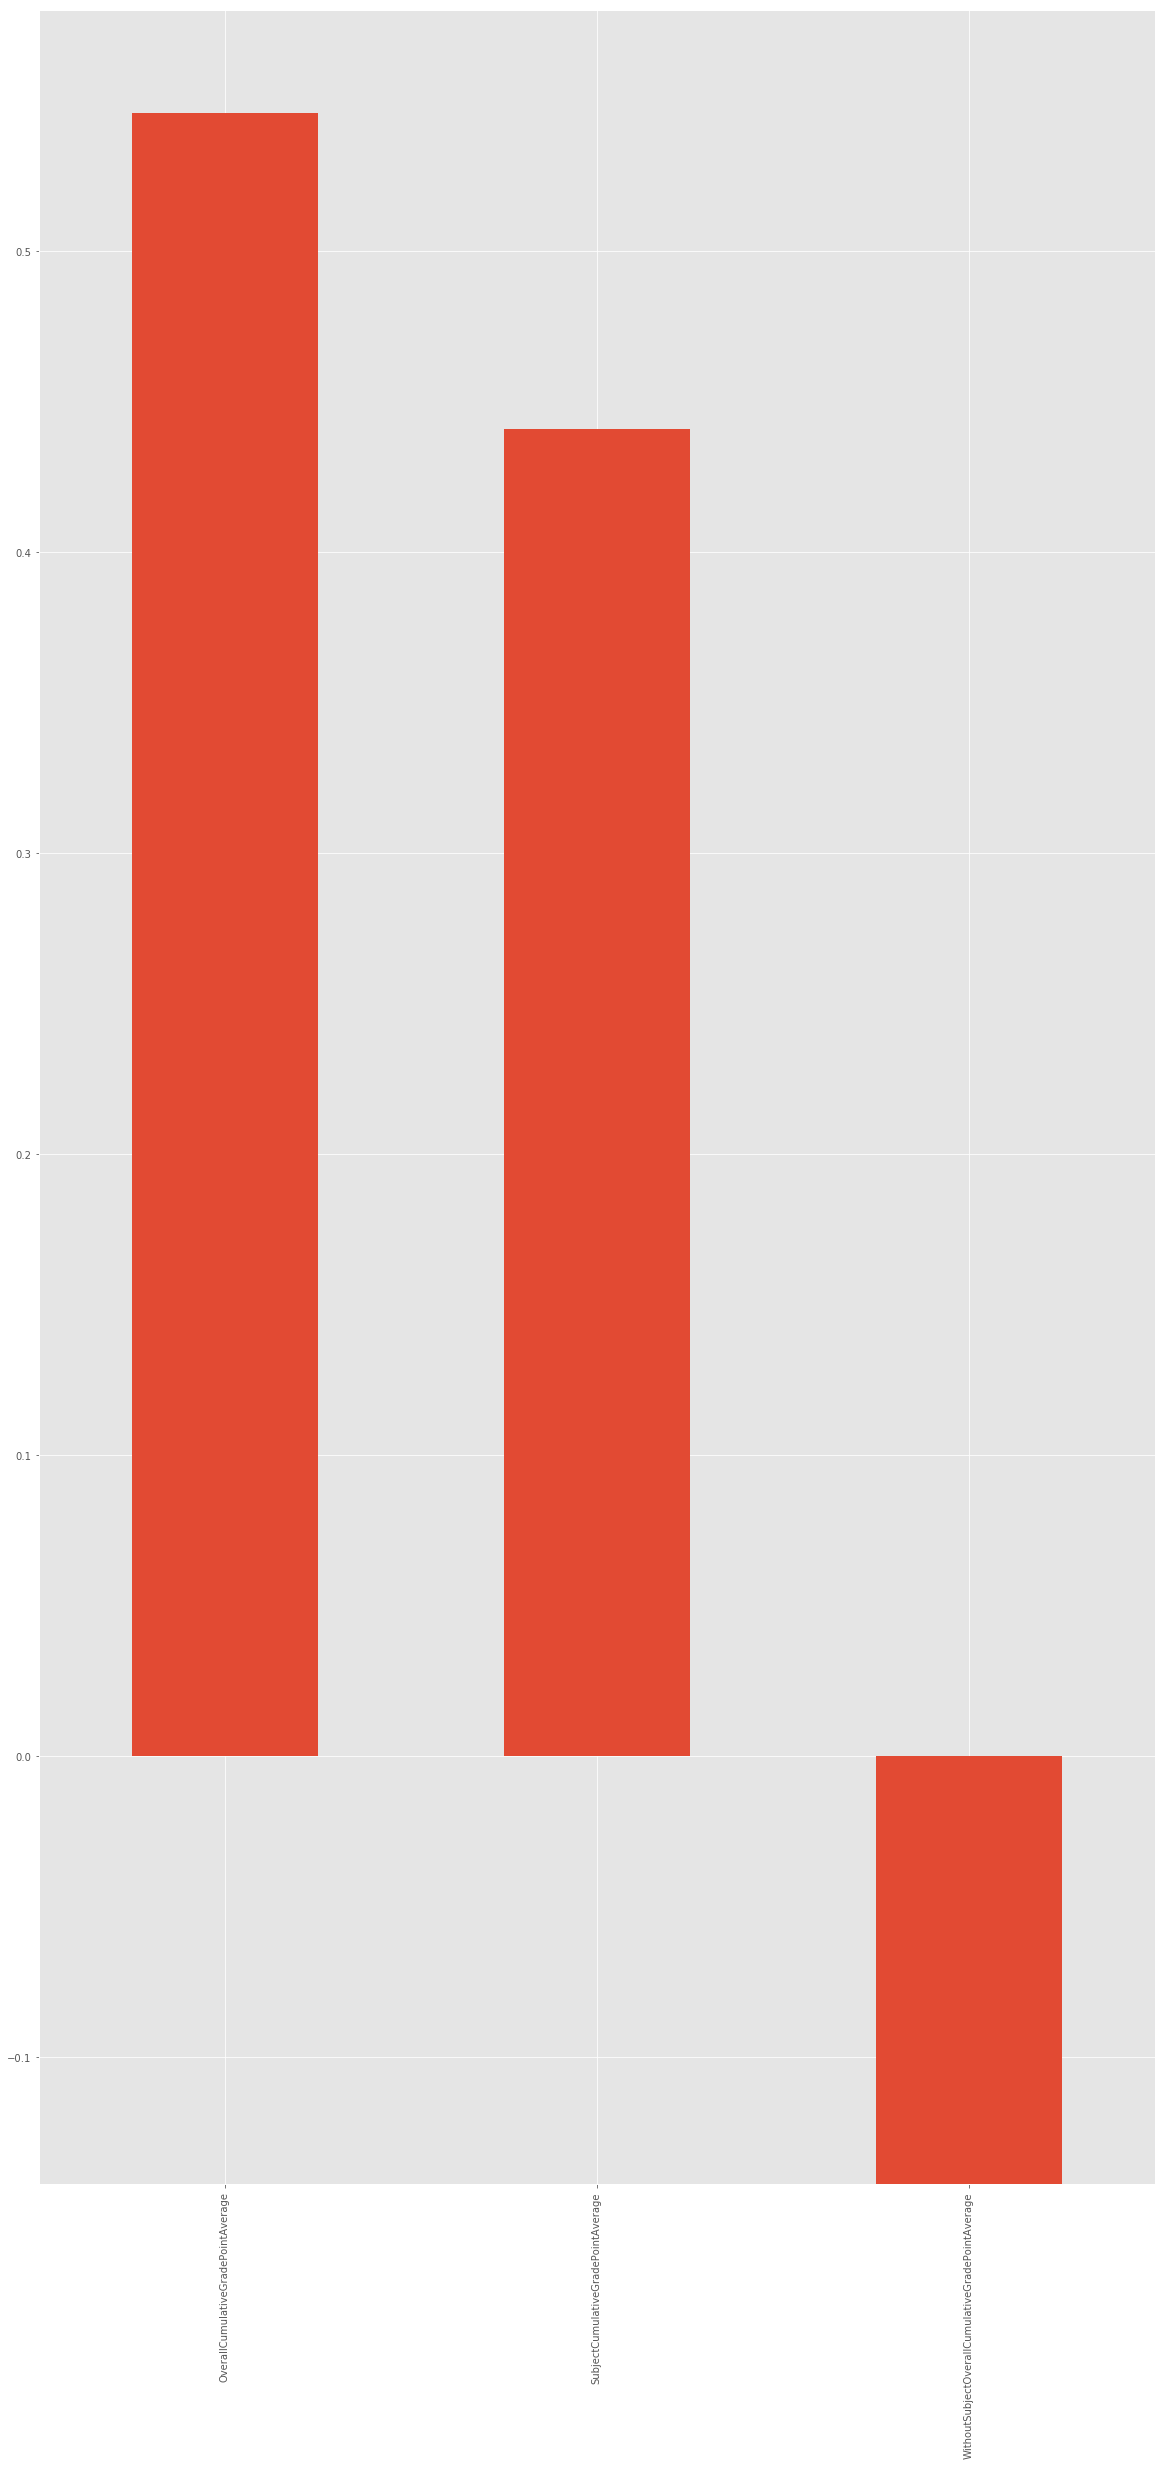

accuracy 0.6733333333333333
confusion matrix
[[ 650  804]
 [ 372 1774]]


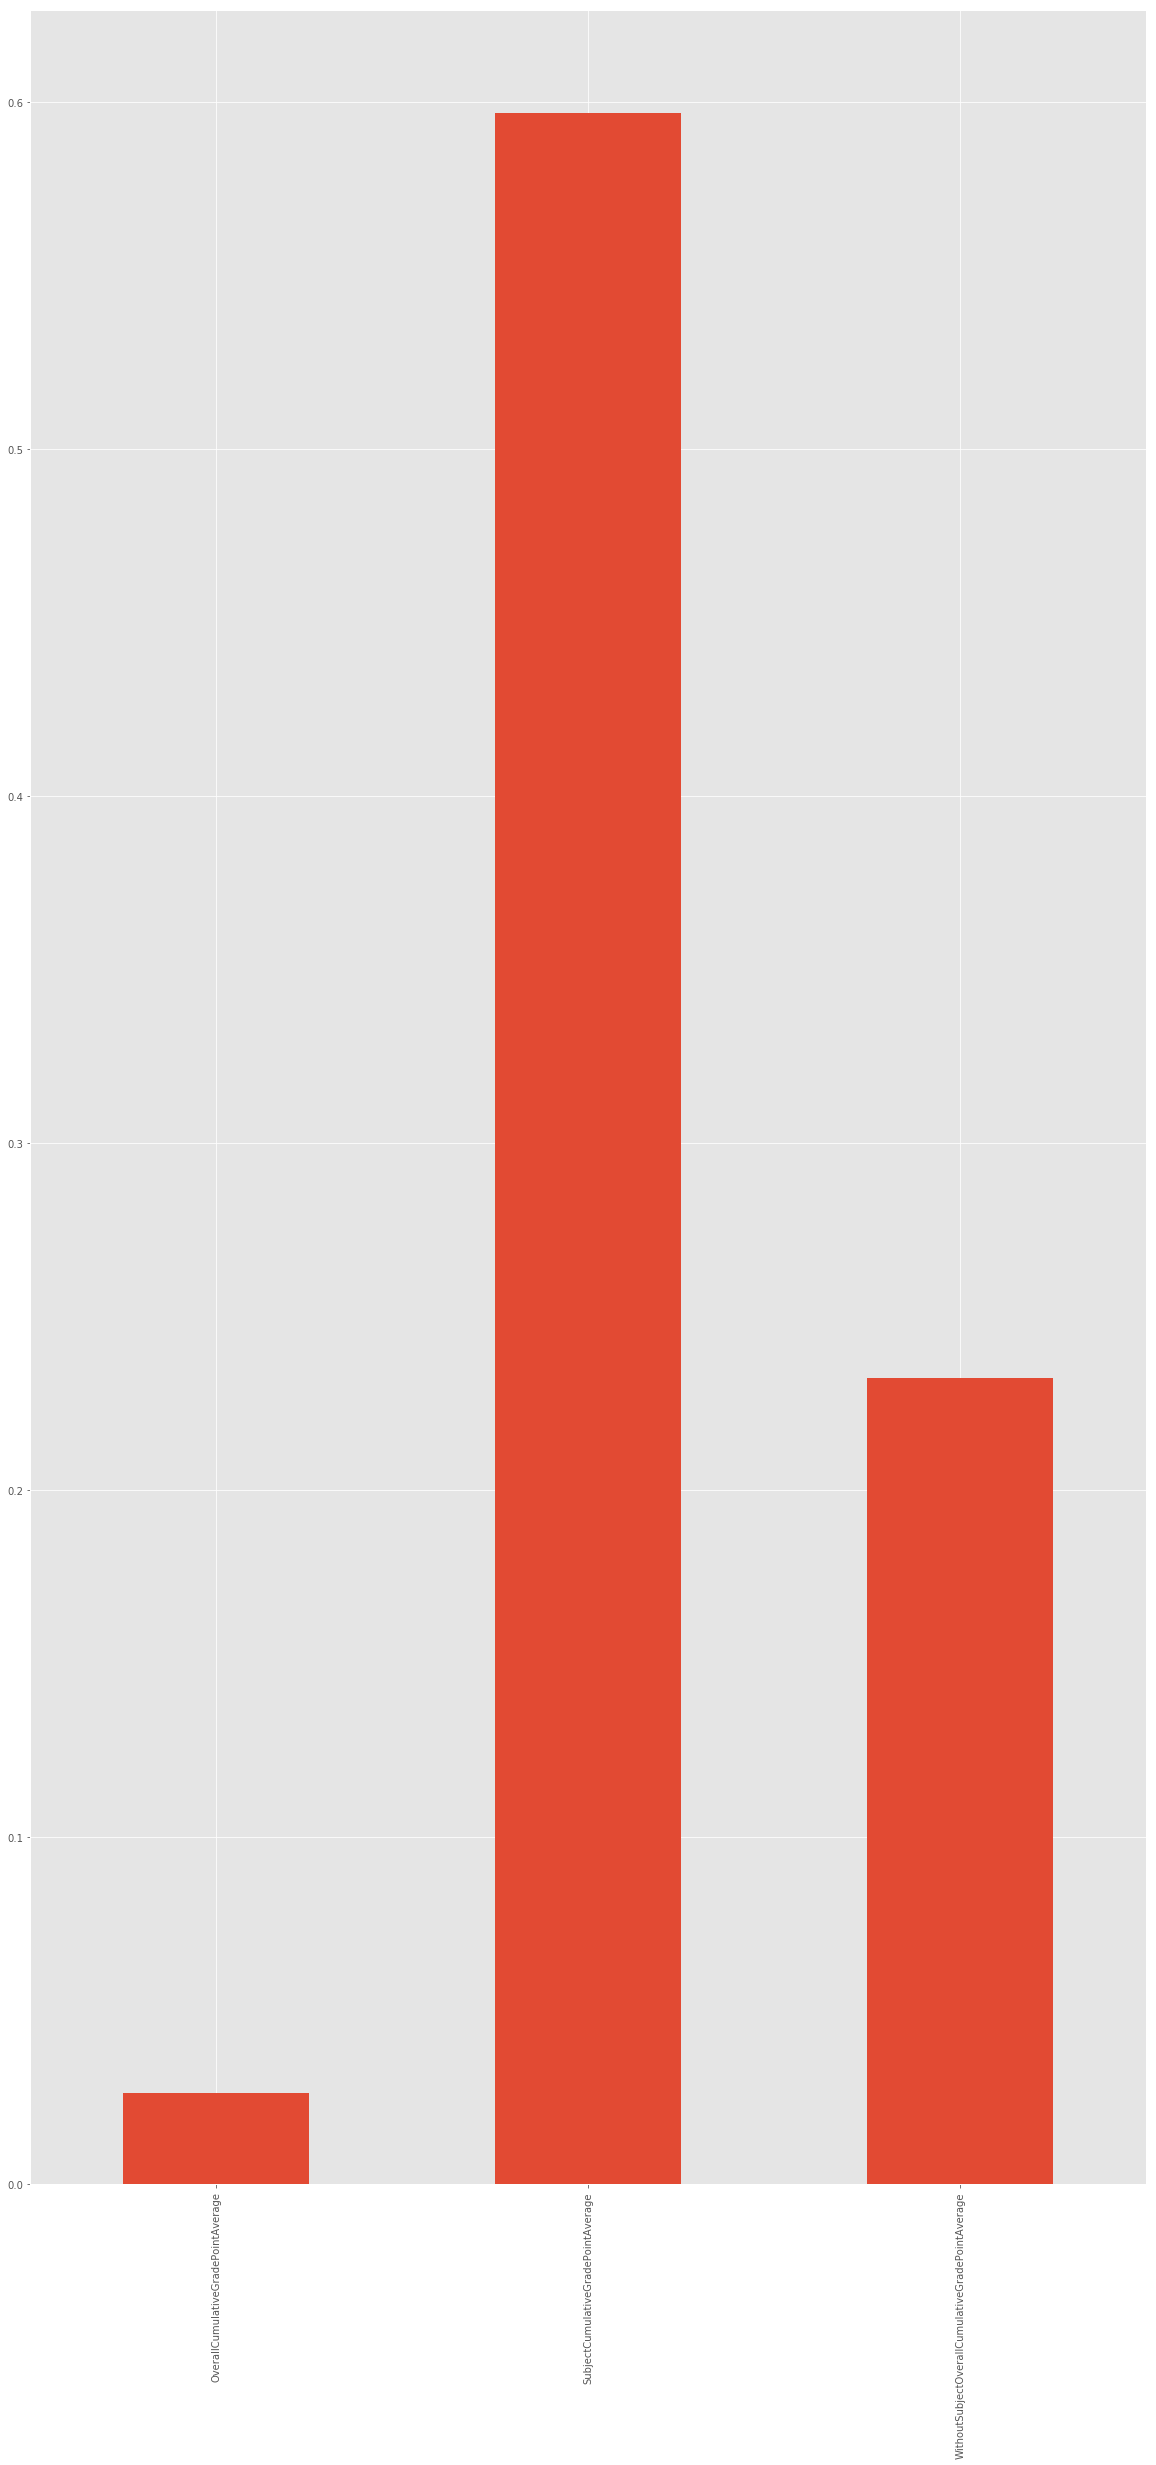

accuracy 0.6661111111111111
confusion matrix
[[ 635  836]
 [ 366 1763]]


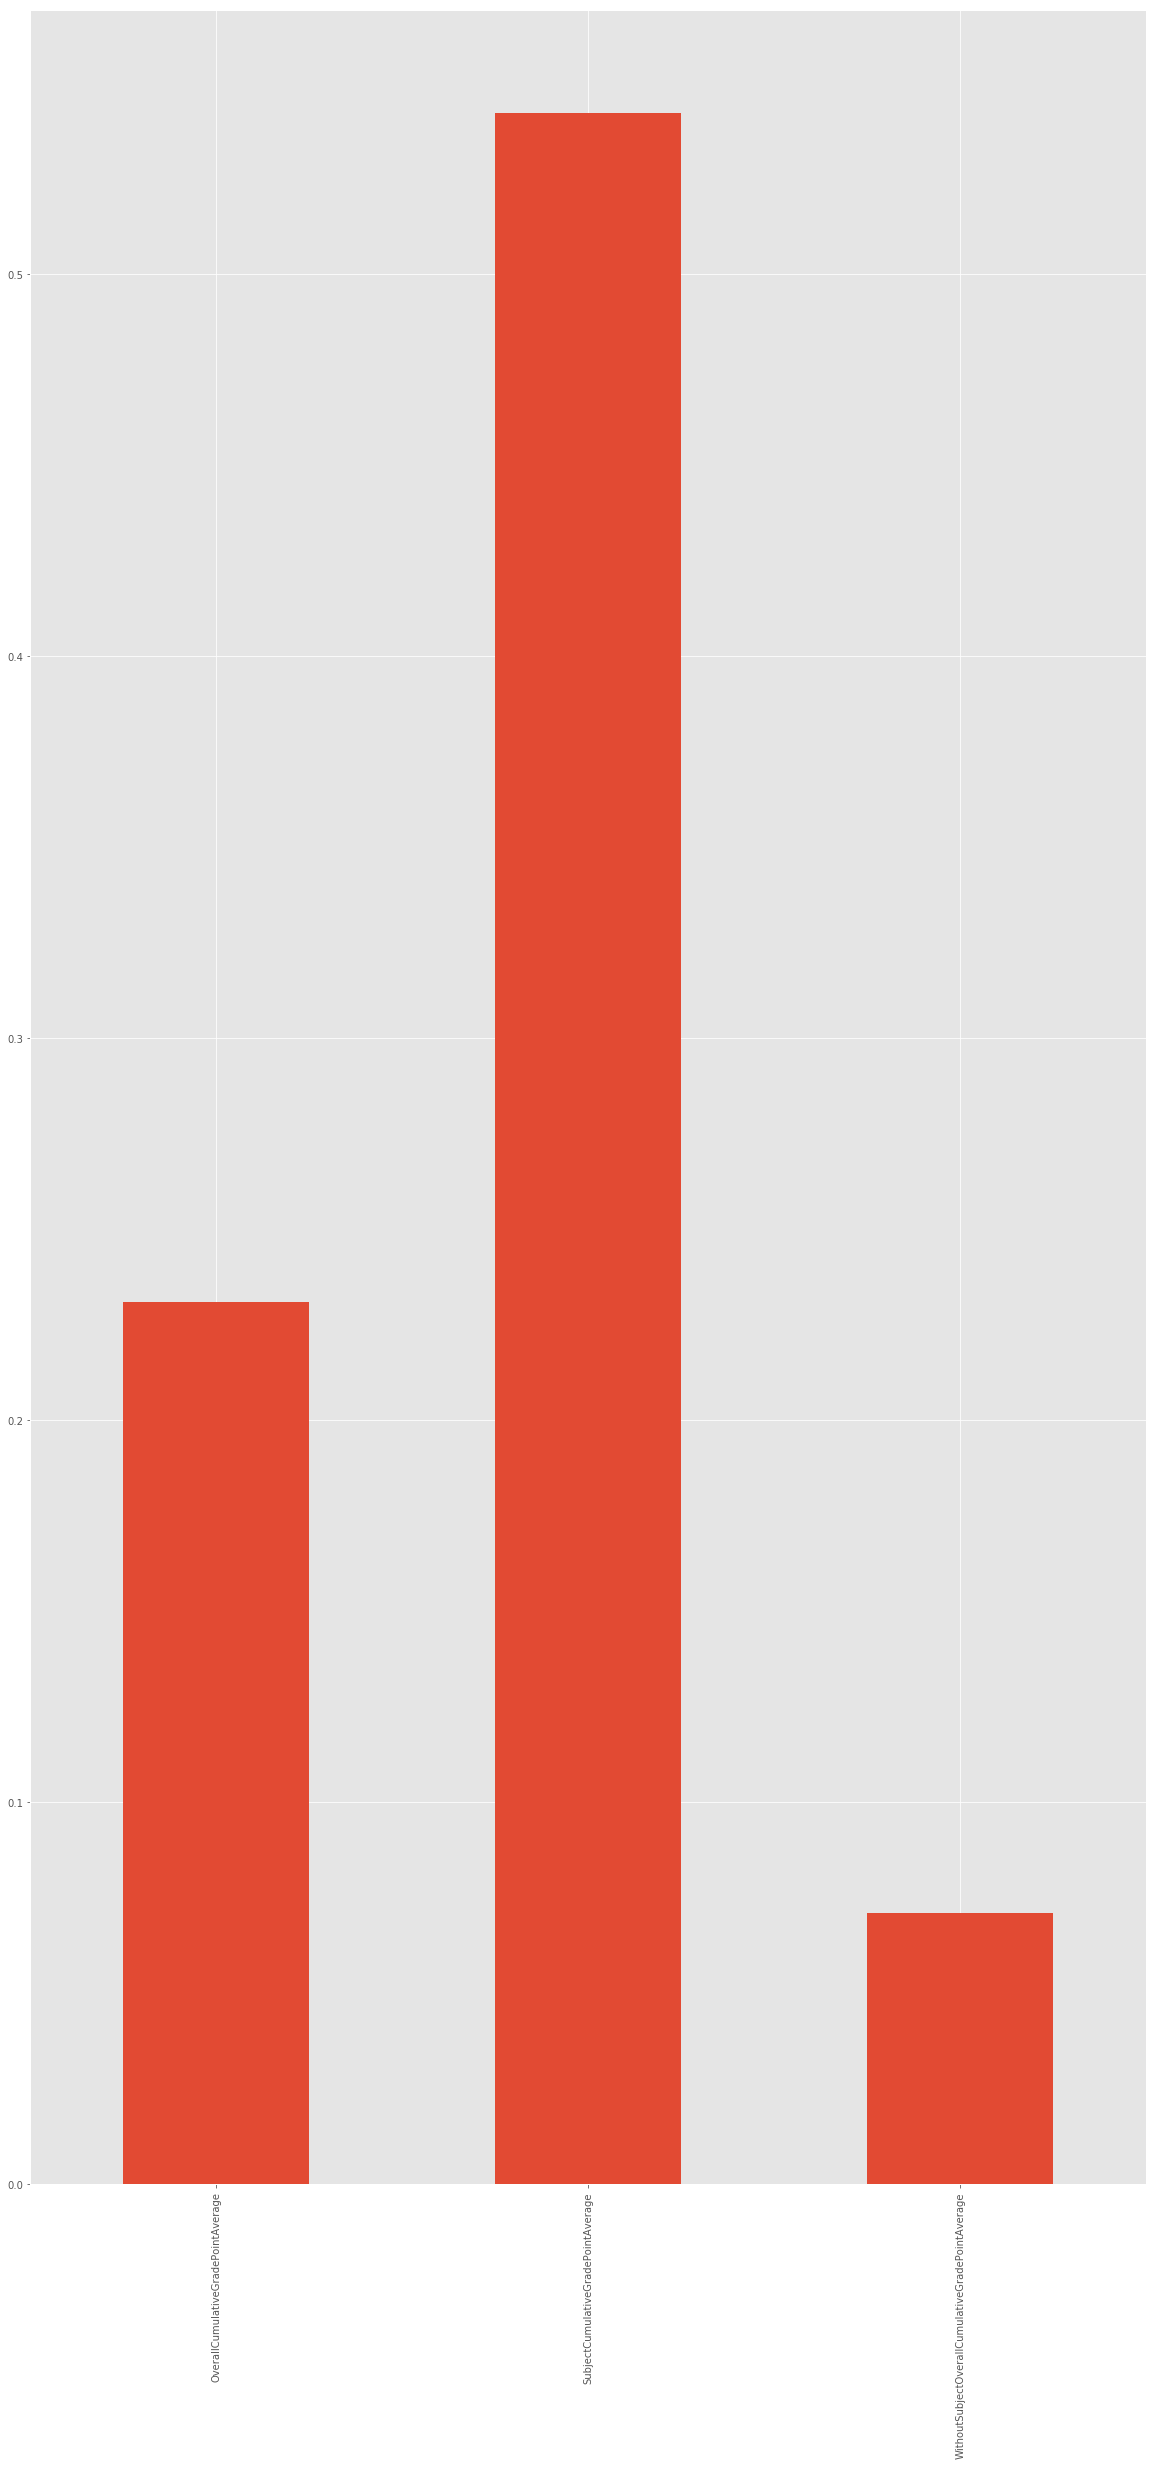

accuracy 0.6633333333333333
confusion matrix
[[ 605  820]
 [ 392 1783]]


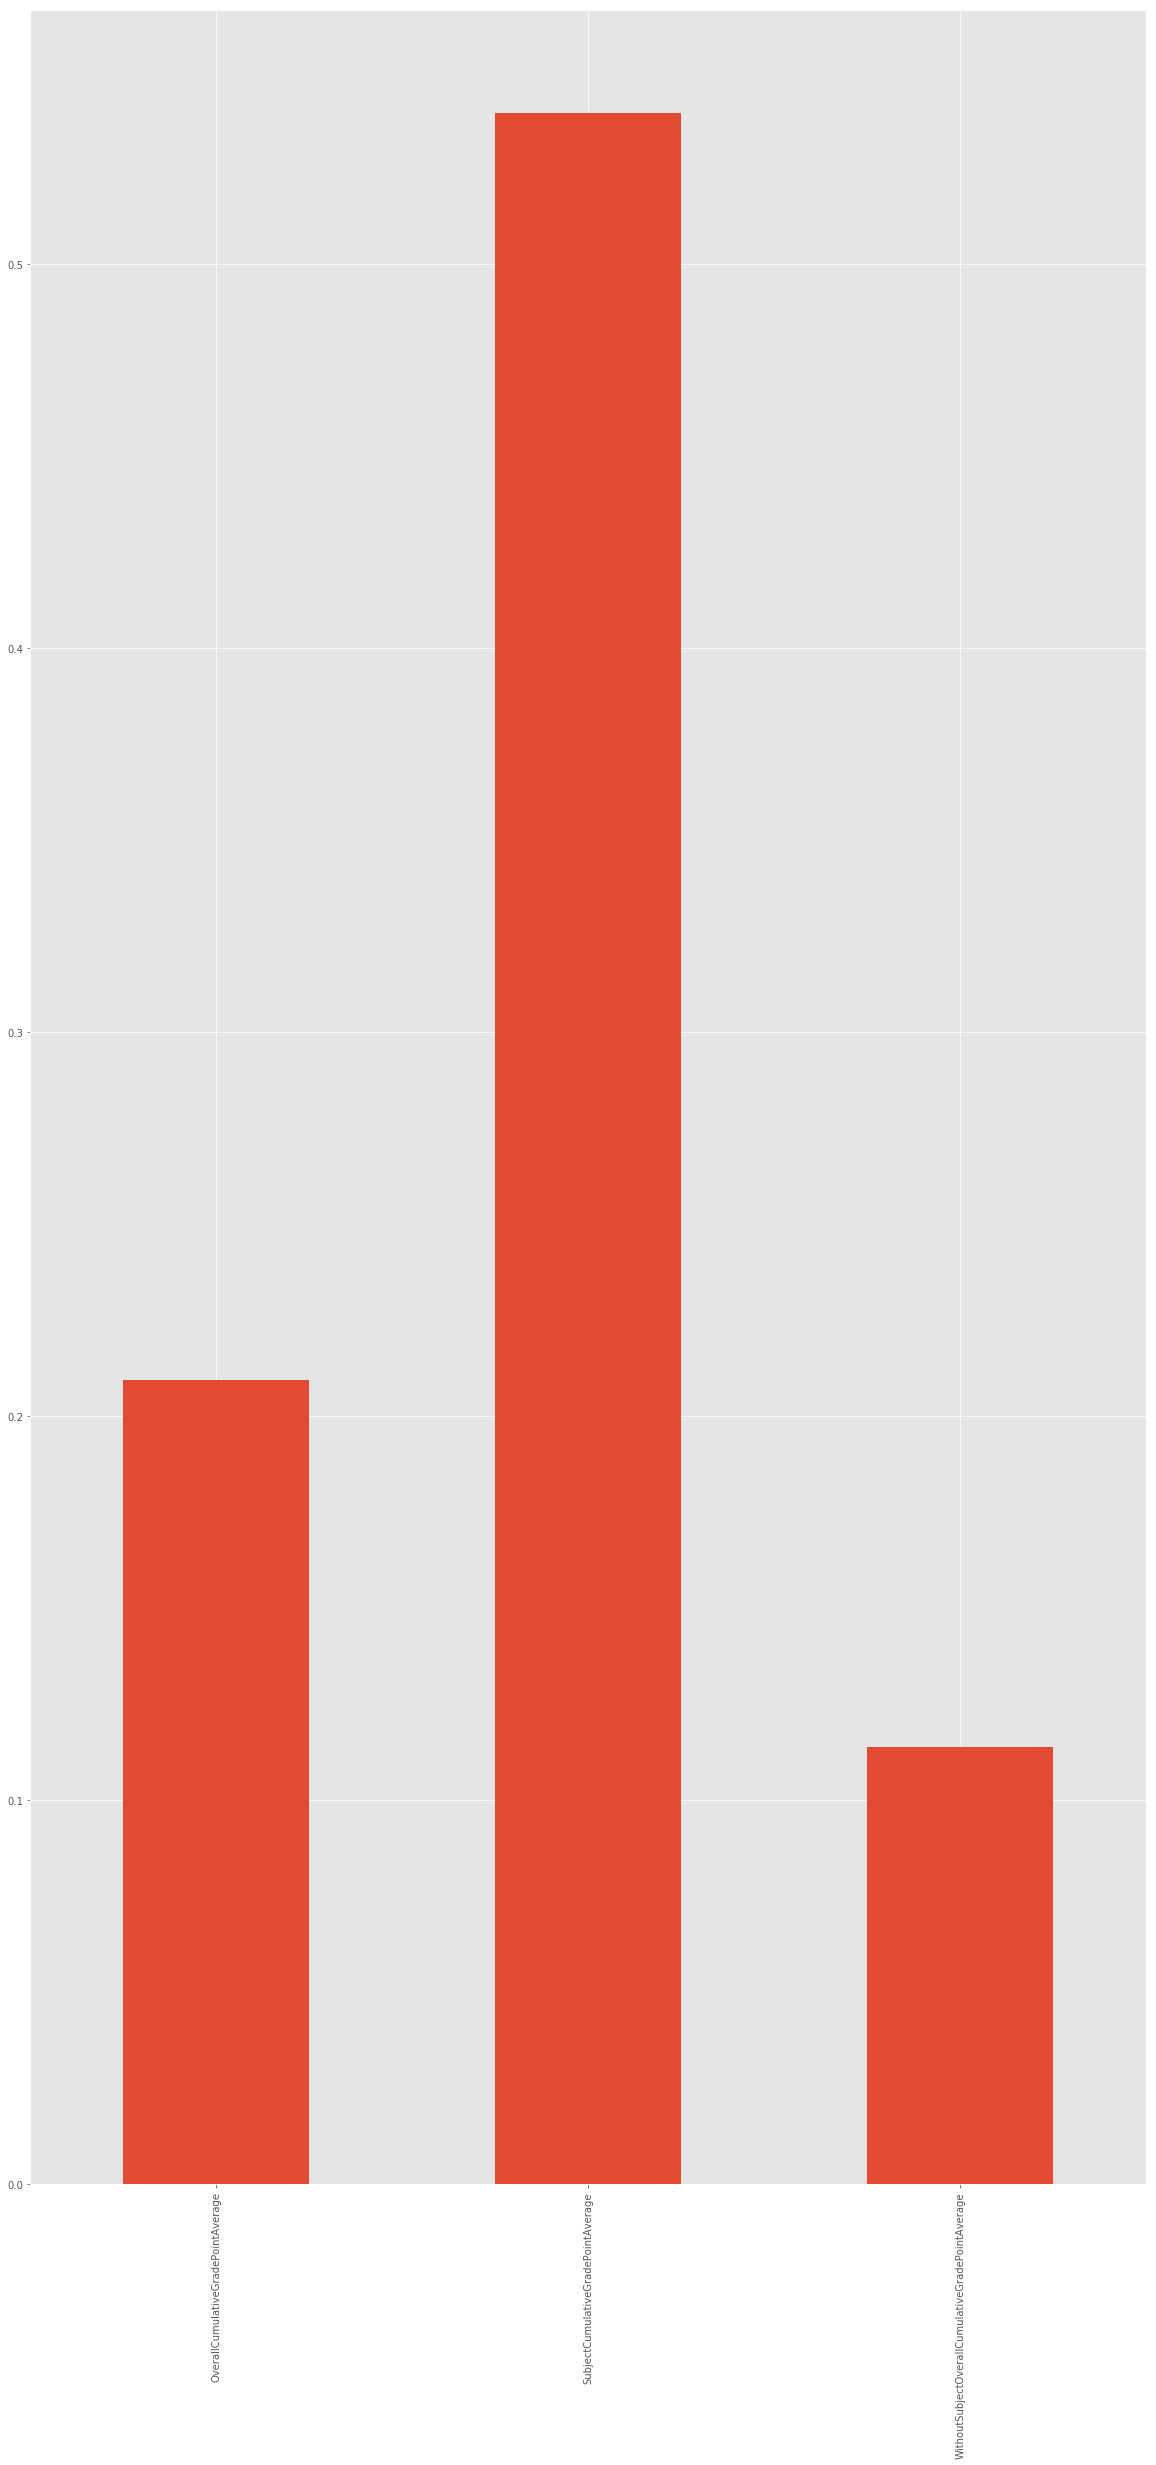

accuracy 0.6613888888888889
confusion matrix
[[ 631  862]
 [ 357 1750]]


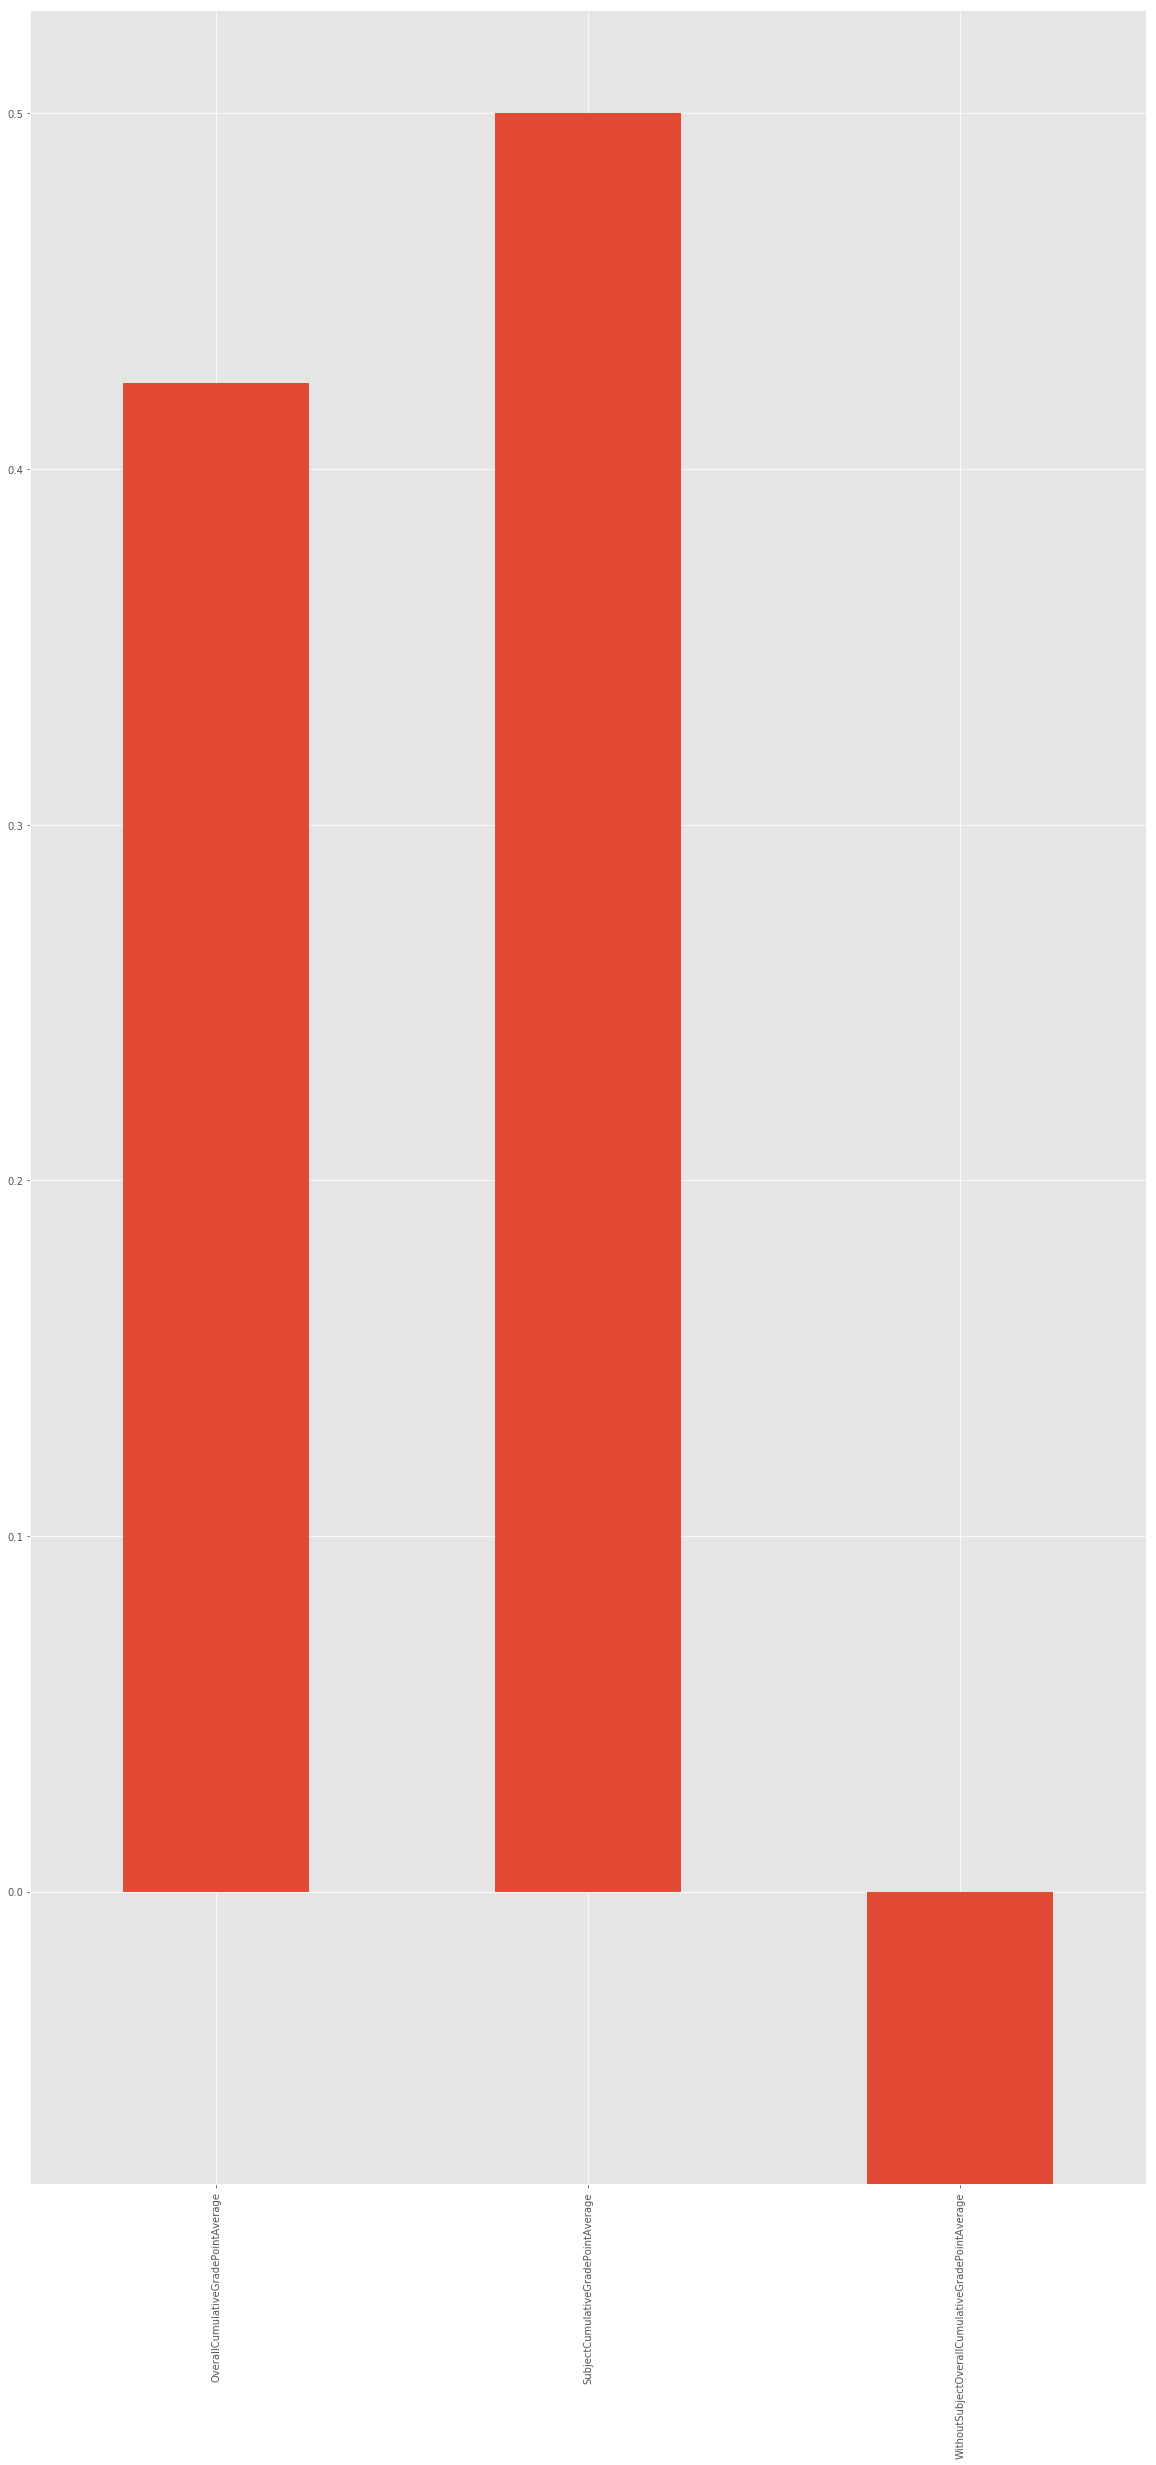

accuracy 0.6516666666666666
confusion matrix
[[ 622  887]
 [ 367 1724]]


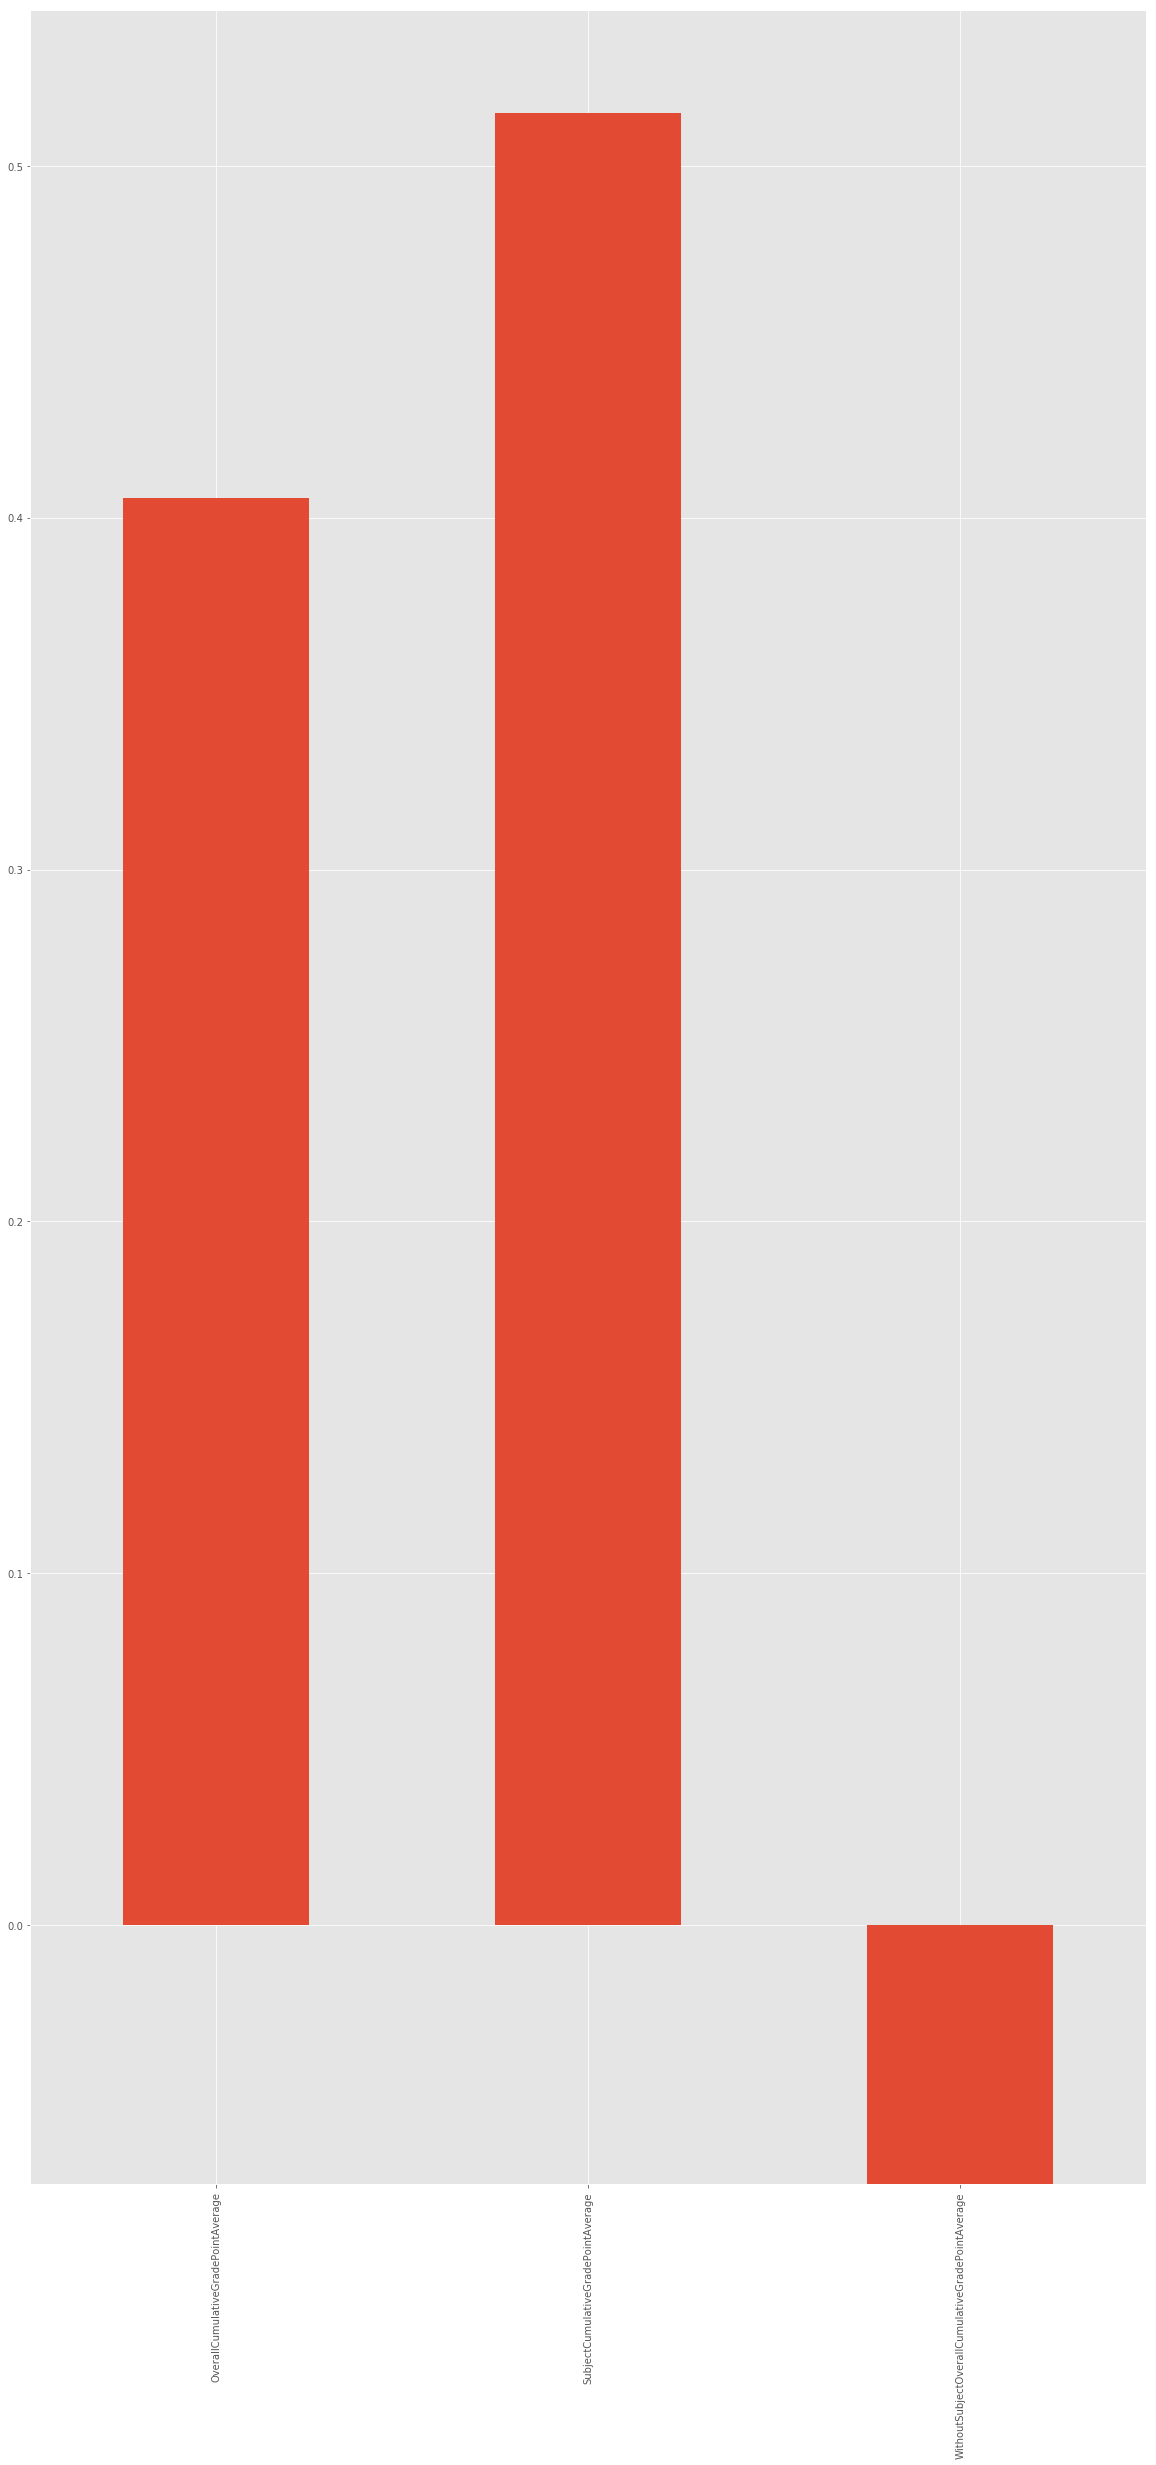

accuracy 0.6575
confusion matrix
[[ 629  821]
 [ 412 1738]]


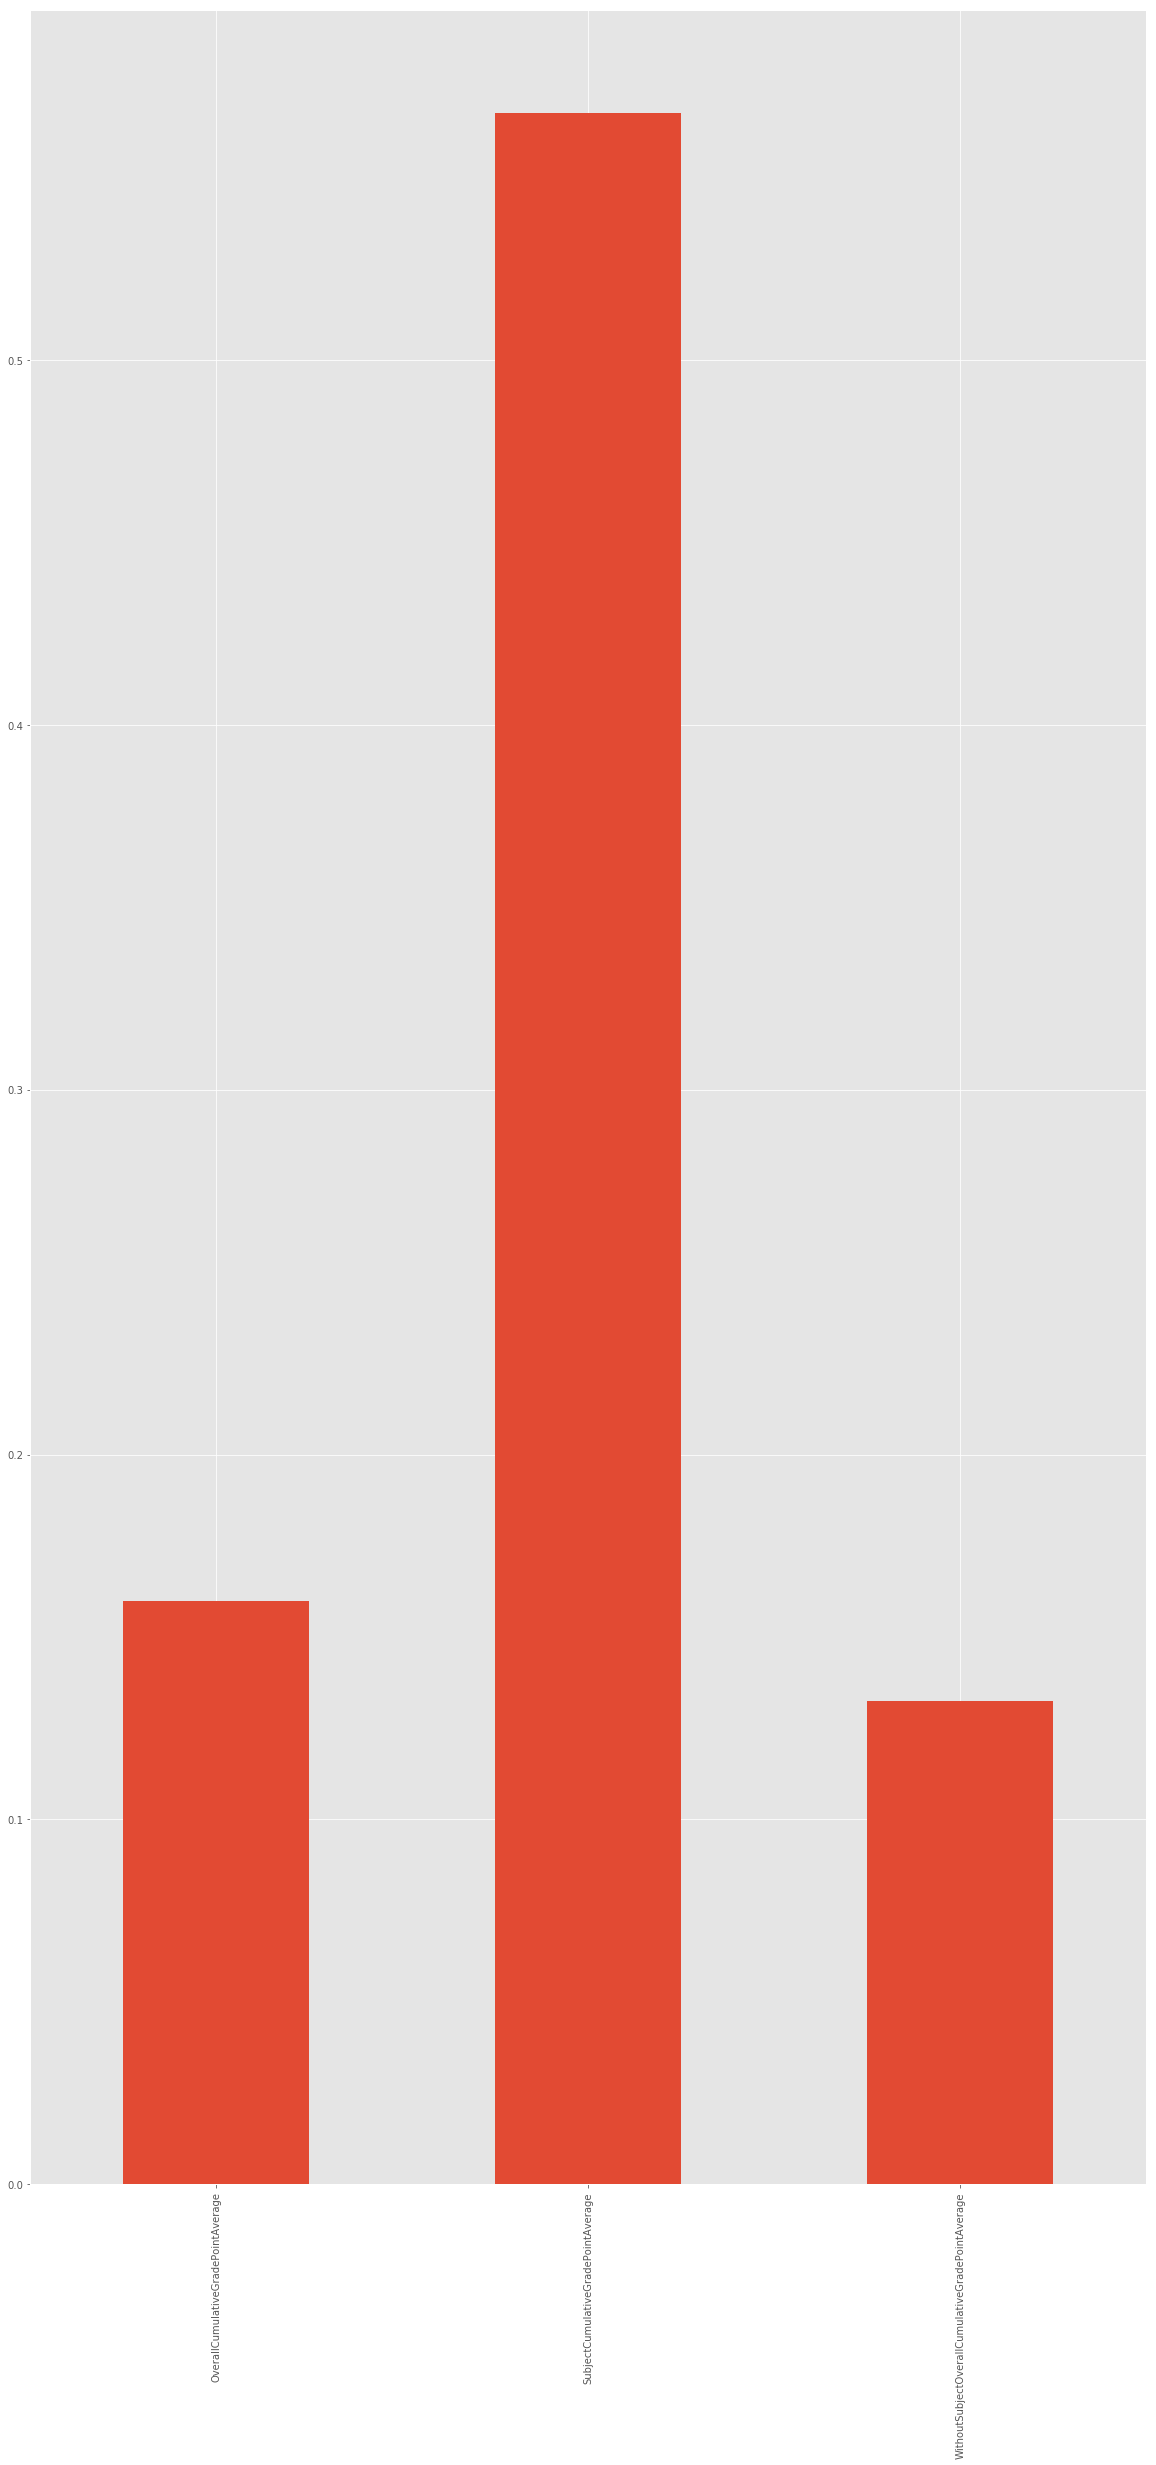

In [42]:
from sklearn.svm import SVC
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
    y_train = y_m[train_indices]
    
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    scl_obj.fit(X_train)
    X_train_scaled = scl_obj.transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test)
    svm_clf = SVC(C=0.5, kernel='linear', degree=3, gamma='auto') # get object
    svm_clf.fit(X_train_scaled, y_train)  # train object

    y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print("accuracy", acc )
    print("confusion matrix")
    print(conf)
   
    weights = pd.Series(svm_clf.coef_[0],index=Z0_stratified_sample.columns)
    weights.plot(kind='bar',figsize=(20,40))
    plt.show()
    train_indicies_linear = train_indices
    support = svm_clf.support_

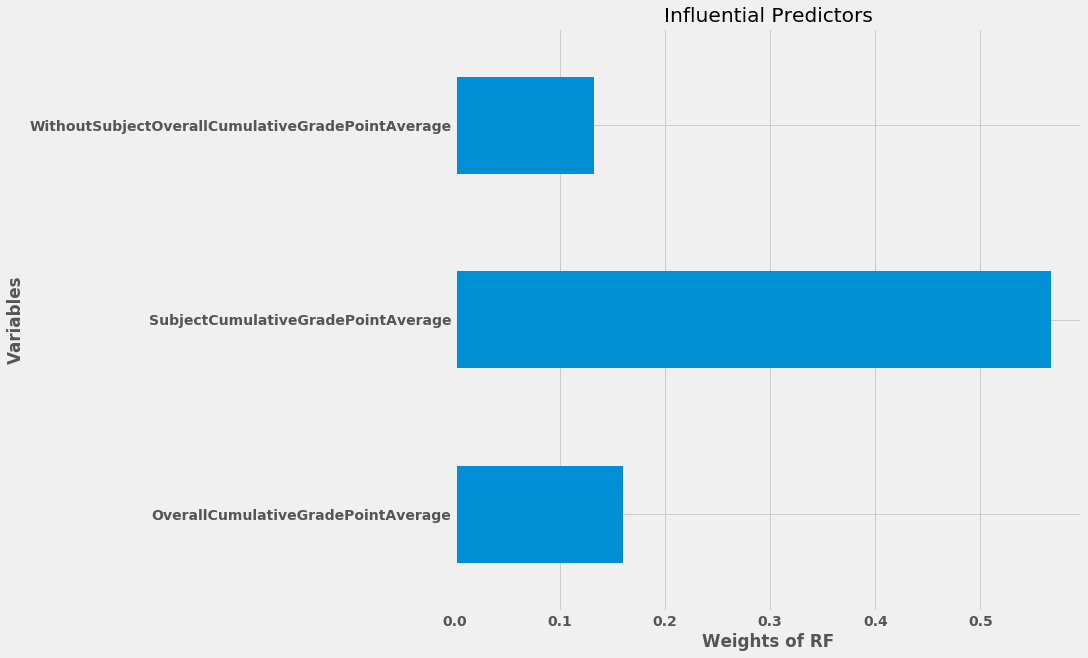

In [43]:
import math
weights2 = weights[abs(weights) > .1]

# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
weights.plot.barh(figsize=(10,10))
plt.title("Influential Predictors")
plt.xlabel('Weights of RF')
plt.ylabel('Variables')

plt.show()

### Decision Tree

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as mt

dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth = 20, 
                                min_samples_leaf=5, min_samples_split=5,max_leaf_nodes = 62,
                               max_features= None,random_state=1234)
accuracy_runs = []
# now get the training and testing
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    # train the decision tree algorithm
    dt_clf.fit(X_train,y_train)
    classe_names = dt_clf.classes_
    print (classe_names)
    digital_label = ['zero', 'one']
    print (digital_label)
    
    from sklearn import tree
    from sklearn.externals.six import StringIO  
    import pydot 



    dot_data = StringIO() 
    tree.export_graphviz(dt_clf, out_file=dot_data, feature_names= X.columns,  
                    class_names=digital_label )
    
    #print ( dot_data.getvalue() )
    graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

    graph[0].write_pdf("EnglishDecisionTree.pdf")
    
    
     
    
    
    
    
    yhat = dt_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

[0 1]
['zero', 'one']
accuracy: 0.6458333333333334
precision: [0.56140351 0.70114943]
recall: [0.55172414 0.70930233]
fscore: [0.55652174 0.70520231]
support: [1450 2150]
[0 1]
['zero', 'one']
accuracy: 0.6458333333333334
precision: [0.56140351 0.70114943]
recall: [0.55172414 0.70930233]
fscore: [0.55652174 0.70520231]
support: [1450 2150]
[0 1]
['zero', 'one']
accuracy: 0.6458333333333334
precision: [0.56140351 0.70114943]
recall: [0.55172414 0.70930233]
fscore: [0.55652174 0.70520231]
support: [1450 2150]
[0 1]
['zero', 'one']
accuracy: 0.6458333333333334
precision: [0.56140351 0.70114943]
recall: [0.55172414 0.70930233]
fscore: [0.55652174 0.70520231]
support: [1450 2150]
[0 1]
['zero', 'one']
accuracy: 0.6458333333333334
precision: [0.56140351 0.70114943]
recall: [0.55172414 0.70930233]
fscore: [0.55652174 0.70520231]
support: [1450 2150]
[0 1]
['zero', 'one']
accuracy: 0.6458333333333334
precision: [0.56140351 0.70114943]
recall: [0.55172414 0.70930233]
fscore: [0.55652174 0.70520

WithoutSubjectOverallCumulativeGradePointAverage has importance of 0.057840785559328
OverallCumulativeGradePointAverage has importance of 0.21829463839149554
SubjectCumulativeGradePointAverage has importance of 0.7238645760491765


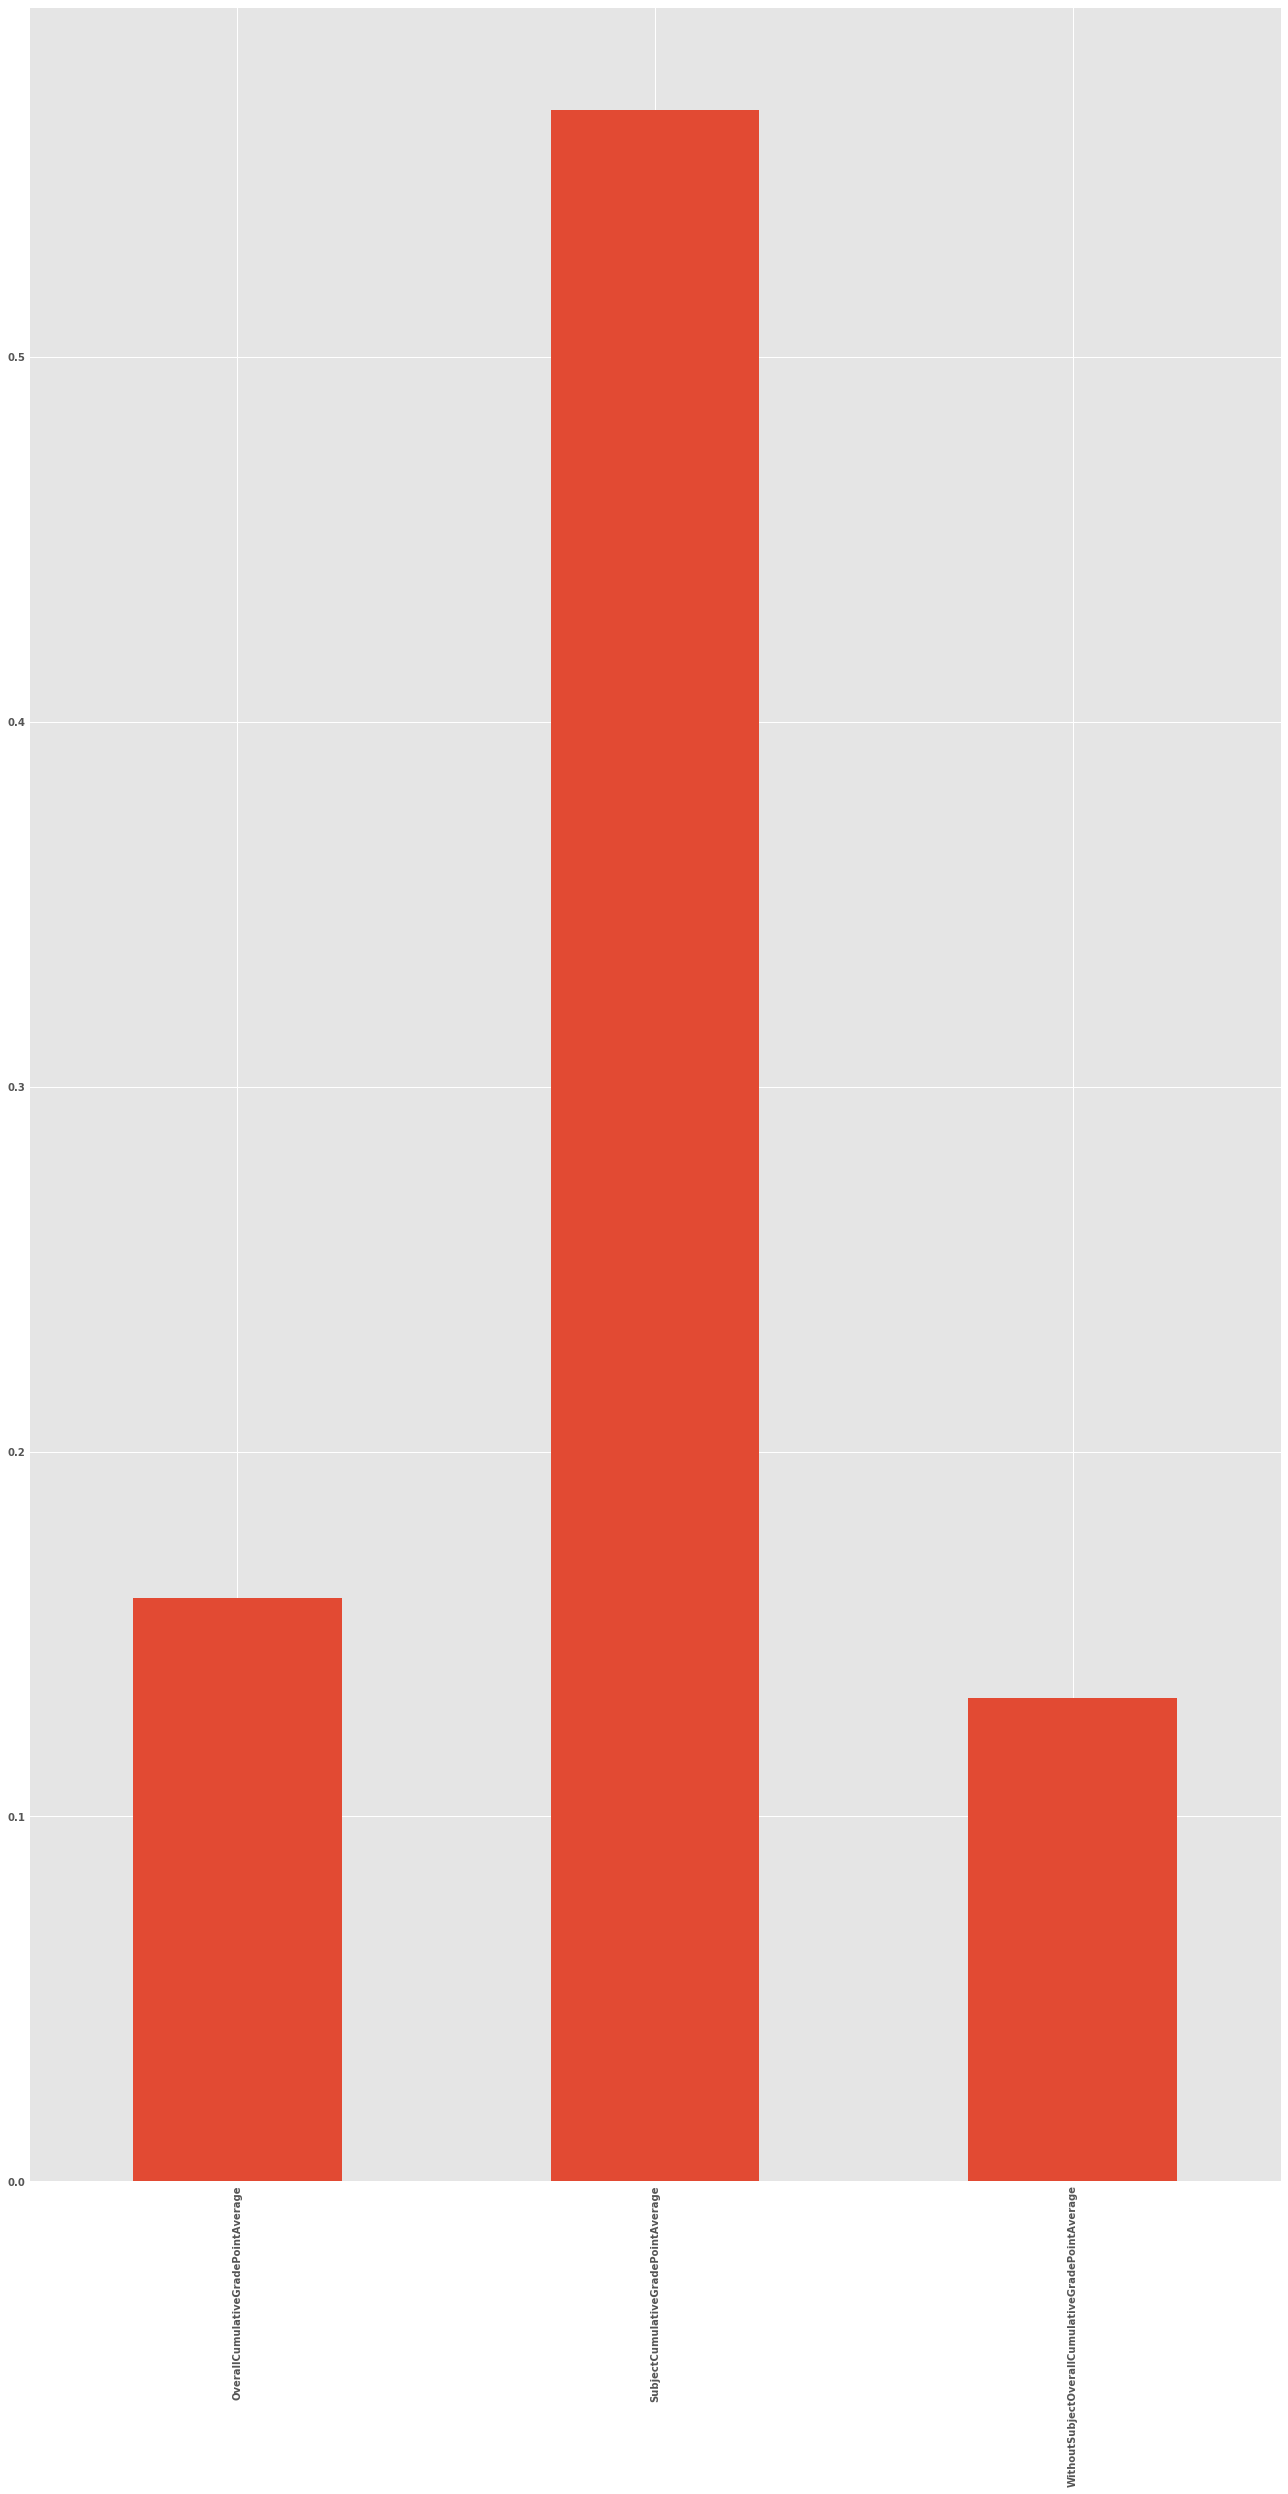

In [45]:
imp = dt_clf.feature_importances_
from matplotlib import pyplot as plt
%matplotlib inline
zip_vars = zip(imp,X.columns) # combine attributes
zip_vars=sorted(zip_vars) # sort them by the magnitude of the weight
for coef, name in zip_vars:
    print(name, 'has importance of', coef)
    
plt.style.use('ggplot')

weights.plot(kind='bar',figsize=(20,40))
plt.show()

### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

accuracy_runs = []

rf_clf = RandomForestClassifier(criterion='gini', max_depth = 10,min_samples_leaf=5,
                                min_samples_split=5,max_leaf_nodes = 62,
                                max_features= None, random_state=1234)
for train_indices, test_indices in cv_object.split(X,y):  
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.6497222222222222
precision: [0.57153671 0.69504168]
recall: [0.52068966 0.73674419]
fscore: [0.54492963 0.71528562]
support: [1450 2150]
accuracy: 0.6497222222222222
precision: [0.57153671 0.69504168]
recall: [0.52068966 0.73674419]
fscore: [0.54492963 0.71528562]
support: [1450 2150]
accuracy: 0.6497222222222222
precision: [0.57153671 0.69504168]
recall: [0.52068966 0.73674419]
fscore: [0.54492963 0.71528562]
support: [1450 2150]
accuracy: 0.6497222222222222
precision: [0.57153671 0.69504168]
recall: [0.52068966 0.73674419]
fscore: [0.54492963 0.71528562]
support: [1450 2150]
accuracy: 0.6497222222222222
precision: [0.57153671 0.69504168]
recall: [0.52068966 0.73674419]
fscore: [0.54492963 0.71528562]
support: [1450 2150]
accuracy: 0.6497222222222222
precision: [0.57153671 0.69504168]
recall: [0.52068966 0.73674419]
fscore: [0.54492963 0.71528562]
support: [1450 2150]
accuracy: 0.6497222222222222
precision: [0.57153671 0.69504168]
recall: [0.52068966 0.73674419]
fscore: [0

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

accuracy_runs = []

rf_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200, random_state=1234)
for train_indices, test_indices in cv_object.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    
    y_train = np.ravel(y_train)
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())

accuracy: 0.6538888888888889
precision: [0.57882535 0.69601041]
recall: [0.51655172 0.74651163]
fscore: [0.54591837 0.72037702]
support: [1450 2150]
accuracy: 0.6538888888888889
precision: [0.57882535 0.69601041]
recall: [0.51655172 0.74651163]
fscore: [0.54591837 0.72037702]
support: [1450 2150]
accuracy: 0.6538888888888889
precision: [0.57882535 0.69601041]
recall: [0.51655172 0.74651163]
fscore: [0.54591837 0.72037702]
support: [1450 2150]
accuracy: 0.6538888888888889
precision: [0.57882535 0.69601041]
recall: [0.51655172 0.74651163]
fscore: [0.54591837 0.72037702]
support: [1450 2150]
accuracy: 0.6538888888888889
precision: [0.57882535 0.69601041]
recall: [0.51655172 0.74651163]
fscore: [0.54591837 0.72037702]
support: [1450 2150]
accuracy: 0.6538888888888889
precision: [0.57882535 0.69601041]
recall: [0.51655172 0.74651163]
fscore: [0.54591837 0.72037702]
support: [1450 2150]
accuracy: 0.6538888888888889
precision: [0.57882535 0.69601041]
recall: [0.51655172 0.74651163]
fscore: [0

In [48]:
from sklearn.model_selection import ShuffleSplit
num_cv_iterations = 1
num_instances = len(y)
cv_object1 = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2, random_state = 998867)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=12345, test_size=0.2, train_size=None)


accuracy: 0.6588888888888889
[[ 764  721]
 [ 507 1608]]
precision: [0.60110149 0.69042508]
recall: [0.51447811 0.76028369]
fscore: [0.55442671 0.72367237]
support: [1485 2115]
average accuracy:  0.6588888888888889
AUC of Precision Recall curve 0.796


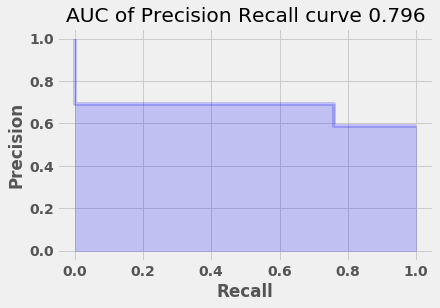

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

accuracy_runs = []

#rf_clf = RandomForestClassifier(n_estimators = 150,criterion='entropy', max_depth = 10, min_samples_leaf=5,
#                                min_samples_split=5,max_leaf_nodes = 62,
#                                max_features= None)

rf_clf = RandomForestClassifier(criterion= 'gini', min_samples_leaf=0.1, min_samples_split=0.2, max_features=None, random_state=98452)

for train_indices, test_indices in cv_object1.split(X,y): 
    X_m = X.as_matrix()
    y_m = y.as_matrix()
    X_train = X_m[train_indices]
    y_train = y_m[train_indices]
    y_train = np.ravel(y_train)
    X_test = X_m[test_indices]
    y_test = y_m[test_indices]
    y_test = np.ravel(y_test)
    
    rf_clf.fit(X_train,y_train)
    yhat = rf_clf.predict(X_test)
    acc = mt.accuracy_score(y_test,yhat)
    accuracy_runs.append(acc)
    print ('accuracy:', acc)
    precision, recall, fscore, support = score(y_test, yhat)
    
    cm = confusion_matrix(y_test, yhat)

    print (cm.view())

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))
    
print ('average accuracy: ', np.array(accuracy_runs).mean())
y_test_probabilities = rf_clf.predict_proba(X_test)

#y_test_probabilities has shape = [n_samples, n_classes]

#y_test_predictions_high_precision = y_test_probabilities[:,1] > 0.7
#y_test_predictions_high_recall = y_test_probabilities[:,1] > 0.3

plt.style.use('fivethirtyeight')
precision, recall, _ = precision_recall_curve(y_test, y_test_probabilities[:,1]>.5)
area = mt.auc(recall, precision)
print("AUC of Precision Recall curve %1.3f" %area)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')
plt.title("AUC of Precision Recall curve %1.3f" %area)
plt.xlabel('Recall')
plt.ylabel('Precision')

SubjectCumulativeGradePointAverage has importance of WithoutSubjectOverallCumulativeGradePointAverage
SubjectCumulativeGradePointAverage has importance of OverallCumulativeGradePointAverage
SubjectCumulativeGradePointAverage has importance of SubjectCumulativeGradePointAverage


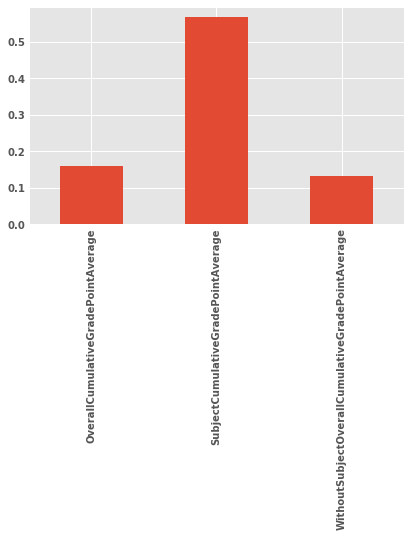

In [50]:
from matplotlib import *
from matplotlib import pyplot as plt
 

%matplotlib inline
zip_vars = zip(rf_clf.feature_importances_,X.columns) # combine attributes
zip_vars=sorted(zip_vars) # sort them 
for coef, coef in zip_vars:
    print(name, 'has importance of', coef)
    
plt.style.use('ggplot')


weights.plot(kind='bar')

 
plt.show()





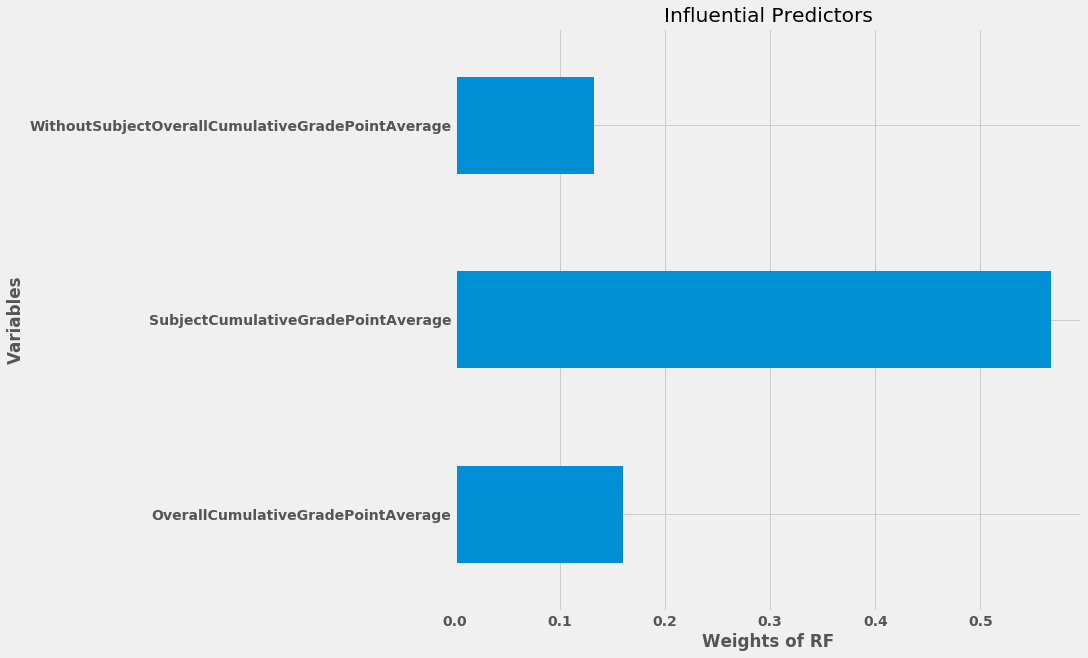

In [51]:

# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
weights.plot.barh(figsize=(10,10))
plt.title("Influential Predictors")
plt.xlabel('Weights of RF')
plt.ylabel('Variables')

plt.show()

In [52]:
df_exclusive = pd.read_csv('EnglishTransferLevel040718_SQL03_Full_Initial.csv',header=0,low_memory=False)


In [53]:
MMAPEnglishFull = df_exclusive
English = df_exclusive
MMAPEnglishFull.shape

(59998, 107)

In [54]:
df_excl_course_success_other_values = English[['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
        'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
        'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
        'hs_10_course_level_code', 'hs_10_course_type_code',  'hs_11_grade_level', 'hs_11_course_title', 
        'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
        'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
        'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
        'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
        'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
        'cc_primacy_course_title', 'cc_primacy_course_grade_category', 'cc_00_course_title', 'cc_00_course_grade', 
        'cc_00_course_grade_category', 'cc_00_course_id', 'cc_primacy_course_id', 'cc_00_course_level', 
        'cc_primacy_course_level', 'cc_primacy_course_grade', 'cc_primacy_course_success_ind', 
        'cc_primacy_college_id', 'cc_primacy_year_term_code', 'cc_primacy_course_grade_points' , 'cc_00_college_id', 
        'cc_00_year_term_code', 'cc_00_course_grade_points', 'hs_09_school_code', 'hs_10_school_code', 'hs_11_school_code',
        'hs_12_school_code', 'hs_recency_school_code', 'IpedsRace','EXPOSITORY_UP11', 'EXPOSITORY_UP11_C', 'EXPOSITORY_UP11_Cplus', 'EXPOSITORY_UP11_Bminus',
                   'EXPOSITORY_UP11_B', 'EXPOSITORY_ANY', 'EXPOSITORY_ANY_C', 'EXPOSITORY_ANY_Cplus',
                   'EXPOSITORY_ANY_Bminus', 'EXPOSITORY_ANY_B', 'REMEDIAL_UP11', 'REMEDIAL_UP11_C', 'REMEDIAL_UP11_Cplus',
                   'REMEDIAL_UP11_Bminus', 'REMEDIAL_UP11_B', 'REMEDIAL_ANY', 'REMEDIAL_ANY_C', 'REMEDIAL_ANY_Cplus',
                   'REMEDIAL_ANY_Bminus', 'REMEDIAL_ANY_B',  'IsDsps', 'IsEops','hs_09_year_term_code', 'hs_10_year_term_code', 'hs_11_year_term_code', 'hs_12_year_term_code',
                   'hs_recency_year_term_code','hs_09_course_id', 'hs_10_course_id', 'hs_11_course_id', 'hs_12_course_id',
                   'hs_recency_course_id','hs_09_course_grade_points', 'hs_09_course_success_ind', 'hs_10_course_grade_points',
                   'hs_10_course_success_ind', 'hs_recency_grade_level', 'hs_11_course_success_ind', 
                   'hs_12_course_success_ind', 'hs_recency_course_success_ind', 'hs_11_course_grade_points',
                   'hs_12_course_grade_points', 'hs_recency_course_grade_points','Gender', 'CohortYear','StudentID']]


In [55]:
Exclcolumns = ['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
        'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
        'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
        'hs_10_course_level_code', 'hs_10_course_type_code',  'hs_11_grade_level', 'hs_11_course_title', 
        'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
        'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
        'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
        'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
        'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
        'cc_primacy_course_title', 'cc_primacy_course_grade_category', 'cc_00_course_title', 'cc_00_course_grade', 
        'cc_00_course_grade_category', 'cc_00_course_id', 'cc_primacy_course_id', 'cc_00_course_level', 
        'cc_primacy_course_level', 'cc_primacy_course_grade', 'cc_primacy_course_success_ind', 
        'cc_primacy_college_id', 'cc_primacy_year_term_code', 'cc_primacy_course_grade_points' , 'cc_00_college_id', 
        'cc_00_year_term_code', 'cc_00_course_grade_points', 'hs_09_school_code', 'hs_10_school_code', 'hs_11_school_code',
        'hs_12_school_code', 'hs_recency_school_code', 'IpedsRace','EXPOSITORY_UP11', 'EXPOSITORY_UP11_C', 'EXPOSITORY_UP11_Cplus', 'EXPOSITORY_UP11_Bminus',
                   'EXPOSITORY_UP11_B', 'EXPOSITORY_ANY', 'EXPOSITORY_ANY_C', 'EXPOSITORY_ANY_Cplus',
                   'EXPOSITORY_ANY_Bminus', 'EXPOSITORY_ANY_B', 'REMEDIAL_UP11', 'REMEDIAL_UP11_C', 'REMEDIAL_UP11_Cplus',
                   'REMEDIAL_UP11_Bminus', 'REMEDIAL_UP11_B', 'REMEDIAL_ANY', 'REMEDIAL_ANY_C', 'REMEDIAL_ANY_Cplus',
                   'REMEDIAL_ANY_Bminus', 'REMEDIAL_ANY_B',  'IsDsps', 'IsEops','hs_09_year_term_code', 'hs_10_year_term_code', 'hs_11_year_term_code', 'hs_12_year_term_code',
                   'hs_recency_year_term_code','hs_09_course_id', 'hs_10_course_id', 'hs_11_course_id', 'hs_12_course_id',
                   'hs_recency_course_id','hs_09_course_grade_points', 'hs_09_course_success_ind', 'hs_10_course_grade_points',
                   'hs_10_course_success_ind', 'hs_recency_grade_level', 'hs_11_course_success_ind', 
                   'hs_12_course_success_ind', 'hs_recency_course_success_ind', 'hs_11_course_grade_points',
                   'hs_12_course_grade_points', 'hs_recency_course_grade_points','Gender', 'CohortYear','StudentID']

English = English.drop(Exclcolumns, axis = 1)

In [56]:
# Remove NAN's
English.dropna(inplace=True)

In [57]:
English

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind
0,3.287,3.763,3.193,1
1,2.736,2.850,2.710,1
2,2.611,2.338,2.672,0
3,2.308,1.756,2.436,0
4,2.583,1.933,2.733,0
5,3.442,3.450,3.441,0
6,2.000,1.778,2.071,1
7,2.843,3.175,2.765,0
8,3.441,3.067,3.497,1
9,3.124,3.333,3.079,1


In [58]:
df_excl_course_success_other_values

,hs_09_grade_level,hs_09_course_title,hs_09_course_grade,hs_09_course_grade_category,hs_09_course_ag_code,hs_09_course_level_code,hs_09_course_type_code,hs_10_grade_level,hs_10_course_title,hs_10_course_grade,...,hs_recency_grade_level,hs_11_course_success_ind,hs_12_course_success_ind,hs_recency_course_success_ind,hs_11_course_grade_points,hs_12_course_grade_points,hs_recency_course_grade_points,Gender,CohortYear,StudentID
0,9.0,ENGLISH I HON,A-,4.0,GB,34,XX,10.0,ENGLISH II CP,A,...,12,1.0,1.0,1,4.0,4.0,4.0,F,2015-2016,1
1,9.0,ENGLISH 9B,A,4.0,B,32,XX,10.0,English 10B,C,...,12,1.0,1.0,1,3.0,2.7,2.7,M,2015-2016,2
2,9.0,P ENGLISH 9,B-,3.0,GB,XX,XX,10.0,P ENGLISH 10,B,...,12,1.0,1.0,1,2.0,2.0,2.0,M,2015-2016,3
3,9.0,ENG 1 P,C-,2.0,B,32,XX,10.0,Eng 2 P,B-,...,12,0.0,1.0,1,0.0,2.7,2.7,M,2014-2015,4
4,9.0,ENGLISH 9 HP,C-,2.0,B,34,XX,10.0,ENGLISH 10 HP,D+,...,12,1.0,1.0,1,2.3,3.0,3.0,M,2012-2013,5
5,9.0,ENGLISH 9 H,A-,4.0,GB,XX,XX,10.0,ENGLISH 10 H,B+,...,12,1.0,1.0,1,3.3,4.0,4.0,M,2014-2015,6
6,9.0,ENGLISH I,F,0.0,GB,XX,XX,10.0,ENGLISH II,F,...,11,1.0,NaN,1,3.0,NaN,3.0,M,2014-2015,7
7,9.0,English 9 H,B+,3.0,B,34,XX,10.0,Eng 10 H,A-,...,11,1.0,NaN,1,1.7,NaN,1.7,F,2015-2016,8
8,9.0,English 9 H,A-,4.0,GB,XX,XX,10.0,English 10 H,B,...,11,1.0,NaN,1,2.7,NaN,2.7,M,2015-2016,9
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,ENG 10-2,B,...,12,1.0,1.0,1,3.7,3.0,3.0,M,2012-2013,10


In [59]:
df_excl_course_success_target_values = English[['cc_00_course_success_ind']]

In [60]:
del English['cc_00_course_success_ind']

df_exclusive_with_coursesuccessvalues = English.join(df_excl_course_success_target_values)

In [61]:
English.dtypes.index

Index(['OverallCumulativeGradePointAverage',
       'SubjectCumulativeGradePointAverage',
       'WithoutSubjectOverallCumulativeGradePointAverage'],
      dtype='object')

In [62]:

y_hat = rf_clf.predict(English)


In [63]:
    acc = mt.accuracy_score(df_excl_course_success_target_values,y_hat)
    accuracy_runs.append(acc)
    conf = mt.confusion_matrix(df_excl_course_success_target_values,y_hat)
    print("====Iteration",iter_num," ====")
    print("accuracy", acc )
    print("confusion matrix\n",conf)
    
    precision, recall, fscore, support = score(df_excl_course_success_target_values, y_hat)

    print('precision: {}'.format(precision))
    print('recall: {}'.format(recall))
    print('fscore: {}'.format(fscore))
    print('support: {}'.format(support))

====Iteration 10  ====
accuracy 0.6742732364315241
confusion matrix
 [[ 9514  8388]
 [11153 30937]]
precision: [0.46034741 0.78670057]
recall: [0.531449   0.73502019]
fscore: [0.49334958 0.7599828 ]
support: [17902 42090]


In [64]:
df_orig = df_exclusive_with_coursesuccessvalues

In [65]:
df_orig['predictedCourseSuccessStatus'] = y_hat

In [66]:
df_orig

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind,predictedCourseSuccessStatus
0,3.287,3.763,3.193,1,1
1,2.736,2.850,2.710,1,1
2,2.611,2.338,2.672,0,0
3,2.308,1.756,2.436,0,0
4,2.583,1.933,2.733,0,0
5,3.442,3.450,3.441,0,1
6,2.000,1.778,2.071,1,0
7,2.843,3.175,2.765,0,1
8,3.441,3.067,3.497,1,1
9,3.124,3.333,3.079,1,1


In [67]:
df_student = df_excl_course_success_other_values['StudentID']

In [68]:
df_orig['StudentID'] = df_student

In [69]:
df_orig['Race'] = df_excl_course_success_other_values['IpedsRace']

In [70]:
df_transfer_all_predictions = df_orig

In [71]:
df_orig.to_csv('OriginalWithPredictions.csv')

In [72]:
df_orig

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind,predictedCourseSuccessStatus,StudentID,Race
0,3.287,3.763,3.193,1,1,1,B
1,2.736,2.850,2.710,1,1,2,W
2,2.611,2.338,2.672,0,0,3,H
3,2.308,1.756,2.436,0,0,4,H
4,2.583,1.933,2.733,0,0,5,W
5,3.442,3.450,3.441,0,1,6,W
6,2.000,1.778,2.071,1,0,7,H
7,2.843,3.175,2.765,0,1,8,H
8,3.441,3.067,3.497,1,1,9,W
9,3.124,3.333,3.079,1,1,10,H


In [73]:
df_orig.describe()

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind,predictedCourseSuccessStatus,StudentID
count,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000,59992.000000
mean,2.793268,2.697248,2.811114,0.701594,0.655504,29999.852230
std,0.601109,0.746214,0.599478,0.457563,0.475208,17319.776321
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.408000,2.217000,2.432000,0.000000,0.000000,15000.750000
50%,2.839000,2.763000,2.857000,1.000000,1.000000,29999.500000
75%,3.234000,3.250000,3.247000,1.000000,1.000000,44998.250000
max,4.000000,4.000000,4.000000,1.000000,1.000000,59998.000000


In [74]:
df_orig_AA = df_orig.loc[df_orig['Race'] == 'B']

In [75]:
df_orig_AA.describe()

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind,predictedCourseSuccessStatus,StudentID
count,1982.000000,1982.000000,1982.000000,1982.000000,1982.00000,1982.000000
mean,2.554340,2.503492,2.561114,0.596872,0.54440,28986.427851
std,0.590798,0.729227,0.601487,0.490650,0.49815,17210.105897
min,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
25%,2.184250,2.000000,2.179000,0.000000,0.00000,13887.250000
50%,2.571000,2.510000,2.585500,1.000000,1.00000,28681.500000
75%,2.961750,3.000000,2.976750,1.000000,1.00000,43842.250000
max,3.944000,4.000000,4.000000,1.000000,1.00000,59996.000000


In [76]:
df_orig_AA_CorrectPred = df_orig_AA.loc[df_orig_AA['cc_00_course_success_ind'] == df_orig_AA['predictedCourseSuccessStatus']]

In [77]:
df_orig_AA_CorrectPred_WillFail = df_orig_AA_CorrectPred.loc[df_orig_AA_CorrectPred['predictedCourseSuccessStatus'] == 0]

In [78]:
df_orig_AA_CorrectPred_WillFail.describe()

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,cc_00_course_success_ind,predictedCourseSuccessStatus,StudentID
count,479.000000,479.000000,479.000000,479.0,479.0,479.000000
mean,2.059526,1.772641,2.116048,0.0,0.0,28308.442589
std,0.485938,0.498882,0.527382,0.0,0.0,17061.579265
min,0.000000,0.000000,0.000000,0.0,0.0,73.000000
25%,1.761000,1.500000,1.781500,0.0,0.0,14410.000000
50%,2.104000,1.857000,2.148000,0.0,0.0,28301.000000
75%,2.413500,2.167000,2.481000,0.0,0.0,42023.000000
max,3.100000,2.450000,3.313000,0.0,0.0,59957.000000


In [79]:
#04-14-2018 Start Non Transfer deductions here

In [80]:

df_exclusive = pd.read_csv('English_NonTransfer0414.csv',header=0,low_memory=False )




In [81]:
English = df_exclusive


In [82]:
English

,CohortYear,StudentID,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,hs_09_grade_level,hs_09_school_code,hs_09_year_term_code,hs_09_course_id,hs_09_course_title,...,cc_00_course_id,cc_00_course_title,cc_00_course_grade,cc_00_course_grade_points,cc_00_course_grade_category,cc_00_course_success_ind,IpedsRace,Gender,IsDsps,IsEops
0,2013-2014,1,2.089,1.525,2.300,9.0,2.465790e+13,20103.0,2102.0,STRATENG1,...,ENGL-01A,College Composition & Reading,W,0.0,-98.0,0.0,H,M,1,0
1,2013-2014,2,2.855,2.456,2.936,9.0,1.964910e+13,20093.0,2130.0,ENGLISH I-B H,...,NaN,NaN,NaN,NaN,NaN,NaN,H,M,0,0
2,2013-2014,3,2.461,2.000,2.505,NaN,NaN,NaN,NaN,NaN,...,ENGL A100,Freshman Composition,B,3.0,3.0,1.0,T,M,0,0
3,2012-2013,4,2.676,2.638,2.687,9.0,3.073640e+13,20095.0,2130.0,ENG 1 ELTR LRNG,...,ENG 1 A,PRINCIPLES OF COMPOSITION I,C,2.0,2.0,1.0,W,F,0,0
4,2013-2014,5,1.361,0.617,1.473,9.0,5.475520e+13,20103.0,2113.0,ENG 1P COMP,...,ENGLP101A,Expository Composition,W,0.0,-98.0,0.0,H,M,0,1
5,2014-2015,6,2.164,1.767,2.273,9.0,1.612420e+12,20113.0,2130.0,ENGLISH 1,...,ENGL1A,Critical Reading & Composition,C,2.0,2.0,1.0,H,M,0,0
6,2012-2013,7,2.581,2.700,2.553,9.0,3.066650e+13,20073.0,2130.0,LANG ART 1,...,ENGL100 F,College Writing,C,2.0,2.0,1.0,H,F,0,0
7,2012-2013,8,2.500,2.156,2.586,9.0,7.617960e+12,20093.0,2130.0,ENGLISH 1 P,...,ENGL-122,Freshman English: Composition and Reading,B,3.0,3.0,1.0,H,F,0,0
8,2015-2016,9,2.840,2.438,2.923,9.0,3.367030e+13,20123.0,2101.0,LANG ARTS 1B,...,NaN,NaN,NaN,NaN,NaN,NaN,W,M,0,0
9,2014-2015,10,2.977,2.500,3.002,NaN,NaN,NaN,NaN,NaN,...,ENGL-101,Freshman Composition,C,2.0,2.0,1.0,H,M,0,0


In [83]:
df_excl_course_success_other_values = English[['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
        'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
        'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
        'hs_10_course_level_code', 'hs_10_course_type_code',  'hs_11_grade_level', 'hs_11_course_title', 
        'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
        'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
        'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
        'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
        'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
        'cc_primacy_course_title', 'cc_primacy_course_grade_category', 'cc_00_course_title', 'cc_00_course_grade', 
        'cc_00_course_grade_category', 'cc_00_course_id', 'cc_primacy_course_id', 'cc_00_course_level', 
        'cc_primacy_course_level', 'cc_primacy_course_grade', 'cc_primacy_course_success_ind', 
        'cc_primacy_college_id', 'cc_primacy_year_term_code', 'cc_primacy_course_grade_points' , 'cc_00_college_id', 
        'cc_00_year_term_code', 'cc_00_course_grade_points', 'hs_09_school_code', 'hs_10_school_code', 'hs_11_school_code',
        'hs_12_school_code', 'hs_recency_school_code', 'IpedsRace','EXPOSITORY_UP11', 'EXPOSITORY_UP11_C', 'EXPOSITORY_UP11_Cplus', 'EXPOSITORY_UP11_Bminus',
                   'EXPOSITORY_UP11_B', 'EXPOSITORY_ANY', 'EXPOSITORY_ANY_C', 'EXPOSITORY_ANY_Cplus',
                   'EXPOSITORY_ANY_Bminus', 'EXPOSITORY_ANY_B', 'REMEDIAL_UP11', 'REMEDIAL_UP11_C', 'REMEDIAL_UP11_Cplus',
                   'REMEDIAL_UP11_Bminus', 'REMEDIAL_UP11_B', 'REMEDIAL_ANY', 'REMEDIAL_ANY_C', 'REMEDIAL_ANY_Cplus',
                   'REMEDIAL_ANY_Bminus', 'REMEDIAL_ANY_B',  'IsDsps', 'IsEops','hs_09_year_term_code', 'hs_10_year_term_code', 'hs_11_year_term_code', 'hs_12_year_term_code',
                   'hs_recency_year_term_code','hs_09_course_id', 'hs_10_course_id', 'hs_11_course_id', 'hs_12_course_id',
                   'hs_recency_course_id','hs_09_course_grade_points', 'hs_09_course_success_ind', 'hs_10_course_grade_points',
                   'hs_10_course_success_ind', 'hs_recency_grade_level', 'hs_11_course_success_ind', 
                   'hs_12_course_success_ind', 'hs_recency_course_success_ind', 'hs_11_course_grade_points',
                   'hs_12_course_grade_points', 'hs_recency_course_grade_points','Gender', 'CohortYear','StudentID','cc_00_course_success_ind']]


In [84]:

Exclcolumns = ['hs_09_grade_level', 'hs_09_course_title', 'hs_09_course_grade', 'hs_09_course_grade_category', 
        'hs_09_course_ag_code', 'hs_09_course_level_code', 'hs_09_course_type_code', 'hs_10_grade_level', 
        'hs_10_course_title', 'hs_10_course_grade', 'hs_10_course_grade_category', 'hs_10_course_ag_code', 
        'hs_10_course_level_code', 'hs_10_course_type_code',  'hs_11_grade_level', 'hs_11_course_title', 
        'hs_11_course_grade', 'hs_11_course_grade_category', 'hs_11_course_ag_code', 'hs_11_course_level_code', 
        'hs_11_course_type_code', 'hs_12_grade_level', 'hs_12_course_title', 'hs_12_course_grade', 
        'hs_12_course_grade_category', 'hs_12_course_ag_code', 'hs_12_course_level_code', 'hs_12_course_type_code', 
        'hs_recency_course_title', 'hs_recency_course_grade', 'hs_recency_course_grade_category', 
        'hs_recency_course_ag_code', 'hs_recency_course_level_code', 'hs_recency_course_type_code', 
        'cc_primacy_course_title', 'cc_primacy_course_grade_category', 'cc_00_course_title', 'cc_00_course_grade', 
        'cc_00_course_grade_category', 'cc_00_course_id', 'cc_primacy_course_id', 'cc_00_course_level', 
        'cc_primacy_course_level', 'cc_primacy_course_grade', 'cc_primacy_course_success_ind', 
        'cc_primacy_college_id', 'cc_primacy_year_term_code', 'cc_primacy_course_grade_points' , 'cc_00_college_id', 
        'cc_00_year_term_code', 'cc_00_course_grade_points', 'hs_09_school_code', 'hs_10_school_code', 'hs_11_school_code',
        'hs_12_school_code', 'hs_recency_school_code', 'IpedsRace','EXPOSITORY_UP11', 'EXPOSITORY_UP11_C', 'EXPOSITORY_UP11_Cplus', 'EXPOSITORY_UP11_Bminus',
                   'EXPOSITORY_UP11_B', 'EXPOSITORY_ANY', 'EXPOSITORY_ANY_C', 'EXPOSITORY_ANY_Cplus',
                   'EXPOSITORY_ANY_Bminus', 'EXPOSITORY_ANY_B', 'REMEDIAL_UP11', 'REMEDIAL_UP11_C', 'REMEDIAL_UP11_Cplus',
                   'REMEDIAL_UP11_Bminus', 'REMEDIAL_UP11_B', 'REMEDIAL_ANY', 'REMEDIAL_ANY_C', 'REMEDIAL_ANY_Cplus',
                   'REMEDIAL_ANY_Bminus', 'REMEDIAL_ANY_B',  'IsDsps', 'IsEops','hs_09_year_term_code', 'hs_10_year_term_code', 'hs_11_year_term_code', 'hs_12_year_term_code',
                   'hs_recency_year_term_code','hs_09_course_id', 'hs_10_course_id', 'hs_11_course_id', 'hs_12_course_id',
                   'hs_recency_course_id','hs_09_course_grade_points', 'hs_09_course_success_ind', 'hs_10_course_grade_points',
                   'hs_10_course_success_ind', 'hs_recency_grade_level', 'hs_11_course_success_ind', 
                   'hs_12_course_success_ind', 'hs_recency_course_success_ind', 'hs_11_course_grade_points',
                   'hs_12_course_grade_points', 'hs_recency_course_grade_points','Gender', 'CohortYear','StudentID','cc_00_course_success_ind']




In [85]:
English = English.drop(Exclcolumns, axis = 1)


In [86]:
English

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage
0,2.089,1.525,2.300
1,2.855,2.456,2.936
2,2.461,2.000,2.505
3,2.676,2.638,2.687
4,1.361,0.617,1.473
5,2.164,1.767,2.273
6,2.581,2.700,2.553
7,2.500,2.156,2.586
8,2.840,2.438,2.923
9,2.977,2.500,3.002


In [87]:
English.dropna(inplace=True)

English



,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage
0,2.089,1.525,2.300
1,2.855,2.456,2.936
2,2.461,2.000,2.505
3,2.676,2.638,2.687
4,1.361,0.617,1.473
5,2.164,1.767,2.273
6,2.581,2.700,2.553
7,2.500,2.156,2.586
8,2.840,2.438,2.923
9,2.977,2.500,3.002


In [88]:

English.dtypes.index



Index(['OverallCumulativeGradePointAverage',
       'SubjectCumulativeGradePointAverage',
       'WithoutSubjectOverallCumulativeGradePointAverage'],
      dtype='object')

In [89]:
y_hat = rf_clf.predict(English)



In [90]:
df_orig = English



In [91]:
df_orig['predictedTransferCourseSuccessStatus'] = y_hat



In [92]:
df_student = df_excl_course_success_other_values['StudentID']

df_orig['StudentID'] = df_student


In [93]:

df_orig['Race'] = df_excl_course_success_other_values['IpedsRace']



In [94]:
df_orig.to_csv('NonTransferWithPredictions.csv')

df_orig



,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,predictedTransferCourseSuccessStatus,StudentID,Race
0,2.089,1.525,2.300,0,1,H
1,2.855,2.456,2.936,1,2,H
2,2.461,2.000,2.505,0,3,T
3,2.676,2.638,2.687,1,4,W
4,1.361,0.617,1.473,0,5,H
5,2.164,1.767,2.273,0,6,H
6,2.581,2.700,2.553,1,7,H
7,2.500,2.156,2.586,0,8,H
8,2.840,2.438,2.923,0,9,W
9,2.977,2.500,3.002,1,10,H


In [95]:
df_orig.describe()



,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,predictedTransferCourseSuccessStatus,StudentID
count,102344.000000,102344.000000,102344.000000,102344.000000,102344.000000
mean,2.391741,2.278637,2.412891,0.426757,51184.653512
std,0.610840,0.763957,0.613651,0.494609,29552.227616
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.986000,1.750000,2.011000,0.000000,25593.750000
50%,2.405000,2.300000,2.430000,0.000000,51183.500000
75%,2.814000,2.833000,2.836000,1.000000,76778.250000
max,4.000000,4.000000,4.000000,1.000000,102372.000000


In [96]:
df_orig_AA = df_orig.loc[df_orig['Race'] == 'B']

df_orig_AA.describe()



,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,predictedTransferCourseSuccessStatus,StudentID
count,5809.000000,5809.000000,5809.000000,5809.000000,5809.000000
mean,2.185934,2.124787,2.194161,0.338268,50967.982269
std,0.592872,0.736983,0.602442,0.473161,29556.683060
min,0.000000,0.000000,0.000000,0.000000,29.000000
25%,1.805000,1.633000,1.805000,0.000000,25535.000000
50%,2.186000,2.143000,2.208000,0.000000,50775.000000
75%,2.579000,2.633000,2.593000,1.000000,76318.000000
max,3.941000,4.000000,3.967000,1.000000,102351.000000


In [97]:
df_orig_AA_CorrectPred_WillPass = df_orig_AA.loc[df_orig_AA['predictedTransferCourseSuccessStatus'] == 1]


In [98]:
df_orig_AA_CorrectPred_WillPass.describe()

,OverallCumulativeGradePointAverage,SubjectCumulativeGradePointAverage,WithoutSubjectOverallCumulativeGradePointAverage,predictedTransferCourseSuccessStatus,StudentID
count,1965.000000,1965.000000,1965.000000,1965.0,1965.000000
mean,2.696527,2.918524,2.643008,1.0,50996.602036
std,0.442415,0.358383,0.501531,0.0,29757.612633
min,0.591000,2.452000,0.000000,1.0,29.000000
25%,2.406000,2.625000,2.320000,1.0,25187.000000
50%,2.679000,2.833000,2.645000,1.0,50404.000000
75%,2.978000,3.125000,2.977000,1.0,76238.000000
max,3.941000,4.000000,3.967000,1.0,102351.000000


In [99]:
MMAPEnglishFull.shape

(59998, 107)

In [100]:
#originalstudentsallowed For Transfer Courses
original_transfer_B = MMAPEnglishFull.loc[MMAPEnglishFull['IpedsRace'] == 'B']
original_transfer_H = MMAPEnglishFull.loc[MMAPEnglishFull['IpedsRace'] == 'H']
original_transfer_A = MMAPEnglishFull.loc[MMAPEnglishFull['IpedsRace'] == 'A']
original_transfer_W = MMAPEnglishFull.loc[MMAPEnglishFull['IpedsRace'] == 'W']


orig_Transfer_B_ActualPass =original_transfer_B.loc[original_transfer_B['cc_00_course_success_ind'] == 1]
orig_Transfer_H_ActualPass =original_transfer_H.loc[original_transfer_H['cc_00_course_success_ind'] == 1]
orig_Transfer_A_ActualPass =original_transfer_A.loc[original_transfer_A['cc_00_course_success_ind'] == 1]
orig_Transfer_W_ActualPass =original_transfer_W.loc[original_transfer_W['cc_00_course_success_ind'] == 1]


#our prediction on how many of the above  same set will pass the  transfer courses
df_Transfer_PredAllB = df_transfer_all_predictions.loc[df_transfer_all_predictions['Race'] == 'B']
df_Transfer_PredAllH = df_transfer_all_predictions.loc[df_transfer_all_predictions['Race'] == 'H']
df_Transfer_PredAllA = df_transfer_all_predictions.loc[df_transfer_all_predictions['Race'] == 'A']
df_Transfer_PredAllW = df_transfer_all_predictions.loc[df_transfer_all_predictions['Race'] == 'W']

df_Transfer_B_predPass =df_Transfer_PredAllB.loc[df_Transfer_PredAllB['predictedCourseSuccessStatus'] == 1]
df_Transfer_H_predPass =df_Transfer_PredAllH.loc[df_Transfer_PredAllH['predictedCourseSuccessStatus'] == 1]
df_Transfer_A_predPass =df_Transfer_PredAllA.loc[df_Transfer_PredAllA['predictedCourseSuccessStatus'] == 1]
df_Transfer_W_predPass =df_Transfer_PredAllW.loc[df_Transfer_PredAllW['predictedCourseSuccessStatus'] == 1]


#our prediction on how many non transfer students will pass the transfer course

df_nonTransfer_B = df_orig.loc[df_orig['Race'] == 'B']
df_nonTransfer_H = df_orig.loc[df_orig['Race'] == 'H']
df_nonTransfer_A = df_orig.loc[df_orig['Race'] == 'A']
df_nonTransfer_W = df_orig.loc[df_orig['Race'] == 'W']

df_nonTransfer_B_predPass =df_nonTransfer_B.loc[df_nonTransfer_B['predictedTransferCourseSuccessStatus'] == 1]
df_nonTransfer_H_predPass =df_nonTransfer_H.loc[df_nonTransfer_H['predictedTransferCourseSuccessStatus'] == 1]
df_nonTransfer_A_predPass =df_nonTransfer_A.loc[df_nonTransfer_A['predictedTransferCourseSuccessStatus'] == 1]
df_nonTransfer_W_predPass =df_nonTransfer_W.loc[df_nonTransfer_W['predictedTransferCourseSuccessStatus'] == 1]




In [101]:
original_transfer_H.shape

(26805, 107)

In [102]:
df_Transfer_W_predPass.shape

(13943, 7)

In [103]:
OriginalTotalB = original_transfer_B.shape[0]
OriginalTotalBPass = orig_Transfer_B_ActualPass.shape[0]
PredictedOriginalBPass = df_Transfer_B_predPass.shape[0]
PredictedTotalBPass = OriginalTotalBPass + df_nonTransfer_B_predPass.shape[0]

OriginalTotalH = original_transfer_H.shape[0]
OriginalTotalHPass = orig_Transfer_H_ActualPass.shape[0]
PredictedOriginalHPass = df_Transfer_H_predPass.shape[0]
PredictedTotalHPass = OriginalTotalHPass + df_nonTransfer_H_predPass.shape[0]


OriginalTotalA = original_transfer_A.shape[0]
OriginalTotalAPass = orig_Transfer_A_ActualPass.shape[0]
PredictedOriginalAPass = df_Transfer_A_predPass.shape[0]
PredictedTotalAPass = OriginalTotalAPass + df_nonTransfer_A_predPass.shape[0]


OriginalTotalW = original_transfer_W.shape[0]
OriginalTotalWPass = orig_Transfer_W_ActualPass.shape[0]
PredictedOriginalWPass = df_Transfer_W_predPass.shape[0]
PredictedTotalWPass = OriginalTotalWPass + df_nonTransfer_W_predPass.shape[0]




In [104]:
df_nonTransfer_W_predPass.shape[0]

8647

In [105]:
PredictedTotalWPass

23175

In [106]:
PredictedTotalHPass

42515

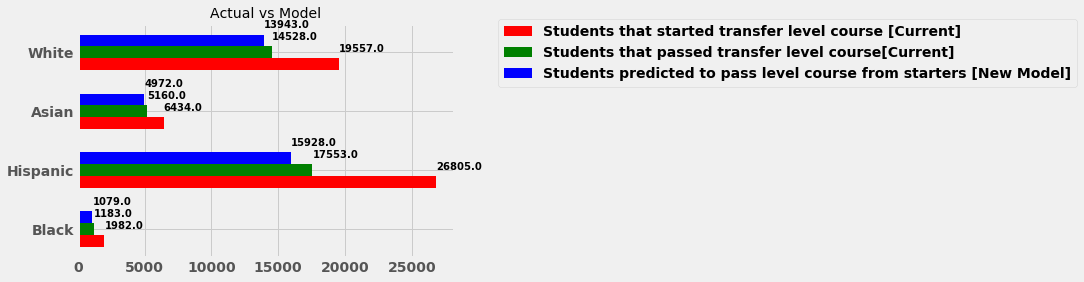

In [140]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

df = pandas.DataFrame(dict(graph=['Black', 'Hispanic', 'Asian', 'White'],
                           Original_allowed = [OriginalTotalB, OriginalTotalH, OriginalTotalA, OriginalTotalW], 
 OriginalPassed = [OriginalTotalBPass, OriginalTotalHPass, OriginalTotalAPass, OriginalTotalWPass],
 PredictedOriginalPass = [PredictedOriginalBPass, PredictedOriginalHPass, PredictedOriginalAPass, PredictedOriginalWPass],
PredictedTotalPass = [PredictedTotalBPass, PredictedTotalHPass, PredictedTotalAPass, PredictedTotalWPass])) 

ind = np.arange(len(df))
width = 0.2

fig, ax = plt.subplots()

rects1 = ax.barh(ind, df.Original_allowed, width, color='red', label='Students that started transfer level course [Current]')

rects2 = ax.barh(ind + width, df.OriginalPassed, width, color='green', label='Students that passed transfer level course[Current]')

rects3 = ax.barh(ind + 2 * width, df.PredictedOriginalPass, width, color='blue', label='Students predicted to pass level course from starters [New Model]')
#ax.barh(ind + width, df.Predicted_Should_allow, width, color='green', label='Students predicted to pass transfer level course[New model]')

# set individual bar lables using above list
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)), fontsize=10, color='black')




#ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[3*width - 1, len(df)])
ax.set(yticks=ind + width, yticklabels=df.graph)
ax.legend(bbox_to_anchor=(1.1, 1.05))



plt.title('Actual vs Model', fontsize=14)
#plt.title('Retrospective analysis using Random Forest classification', fontsize=14)
#plt.suptitle('Increased transfer level success due to proper placement', y=1.00, fontsize=18)





plt.subplots_adjust(hspace=0.001)


plt.show()

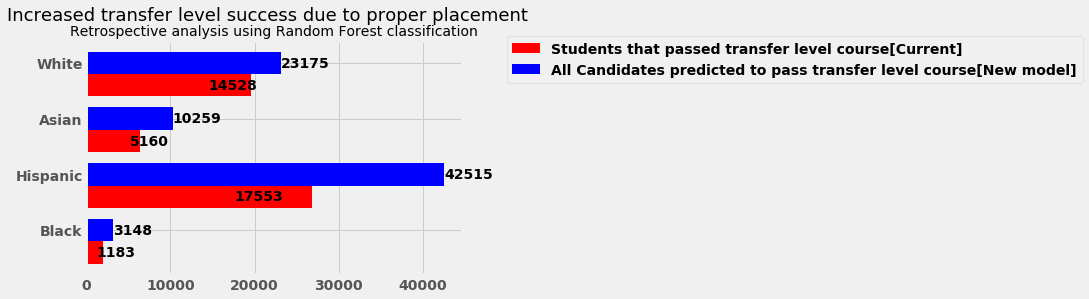

In [128]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

df = pandas.DataFrame(dict(graph=['Black', 'Hispanic', 'Asian', 'White'],
                           Original_allowed = [OriginalTotalB, OriginalTotalH, OriginalTotalA, OriginalTotalW], 
 OriginalPassed = [OriginalTotalBPass, OriginalTotalHPass, OriginalTotalAPass, OriginalTotalWPass],
 PredictedOriginalPass = [PredictedOriginalBPass, PredictedOriginalHPass, PredictedOriginalAPass, PredictedOriginalWPass],
PredictedTotalPass = [PredictedTotalBPass, PredictedTotalHPass, PredictedTotalAPass, PredictedTotalWPass])) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()
#ax.barh(ind + width, df.Original_allowed, width, color='red', label='Students that started transfer level course [Current]')
ax.barh(ind, df.Original_allowed, width, color='red', label='Students that passed transfer level course[Current]')
#ax.barh(ind + 2 * width, df.PredictedOriginalPass, width, color='blue', label='Students predicted to pass level course from starters [New Model]')
for y, x in enumerate(df['OriginalPassed']):
    plt.annotate(str(x), xy=(x, y), va='center')

ax.barh(ind + width, df.PredictedTotalPass, width, color='blue', label='All Candidates predicted to pass transfer level course[New model]')

for y, x in enumerate(df['PredictedTotalPass']):
    plt.annotate(str(x), xy=(x+width, y+width), va='center') 

#ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[3*width - 1, len(df)])
ax.set(yticks=ind + width, yticklabels=df.graph)

#plt.title('Actual vs Model', fontsize=14)
plt.title('Retrospective analysis using Random Forest classification', fontsize=14)
plt.suptitle('Increased transfer level success due to proper placement', y=1.00, fontsize=18)

ax.legend(bbox_to_anchor=(1.1, 1.05))

 
plt.show()